### generale imports 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import netCDF4
import numpy as np
import pandas as pd
import os 
import shapefile
from shapely import wkt
import seaborn as sns
import datetime
import math
from shapely.geometry import Point , Polygon

## A. data Manipulation

### 1. data import and visualize

In [2]:
df_soil = pd.read_excel("soil_dz_allprops.xlsx")
df_soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-null    float64
 1

In [10]:
df_soil["geometry"].value_counts()

geometry
POLYGON ((4.505320072174072 19.232820510864258, 4.3909502029418945 19.204599380493164, 4.4532999992370605 19.237319946289062, 4.4886298179626465 19.249879837036133, 4.503950119018555 19.24066925048828, 4.505320072174072 19.232820510864258))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### 2.Full Description about the dataset :

This Algerian soil dataset comprises chemical analyses of topsoil and subsoil samples from various locations, spatially referenced by polygon geometries. The data includes percentages of 13 components for each layer: sand, silt, clay, pH (water), organic carbon (OC), nitrogen (N), base saturation (BS), cation exchange capacity (CEC), clay CEC, calcium carbonate (CaCO3), bulk density (BD), and the C/N ratio. each and the dataset provide the % of each one in top soil and sub soil in diffrent areas

### 3.Delet Update instance

In [12]:
index_to_delete = int(input("choose the instance index to delete or update: ")) 
method = input("chose wthe opeartion (delete or update) ")
if method == "delete":
    df_soil = df_soil.drop(index_to_delete , axis =0)
elif method == "update":
    column = input("choose the column to update : ")
    print(f"{df_soil.loc[index_to_delete]}")
    if df_soil[column].dtype in ["float64"]:
        df_soil.loc[index_to_delete, column] = float(input("Enter new value"))
    else : 
        df_soil.loc[index_to_delete, column] = input("Enter new value")
df_soil

,CNT_FULLNAME,sand % topsoil,sand % subsoil,silt % topsoil,silt% subsoil,clay % topsoil,clay % subsoil,pH water topsoil,pH water subsoil,OC % topsoil,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,ALGERIA,49.570,43.090,28.200,24.200,22.230,32.710,5.860,5.390,2.4110,...,12.420,21.50,35.8,0.030,0.090,1.780,1.780,20.8,12.10,"POLYGON ((5.488269805908203 36.69034957885742,..."
2,ALGERIA,57.390,55.210,24.315,22.825,18.295,21.965,6.270,5.750,1.2295,...,8.325,20.45,26.1,0.035,0.035,1.690,1.690,18.7,13.00,POLYGON ((7.367879867553711 36.955509185791016...
3,ALGERIA,20.410,24.080,32.930,29.190,46.620,46.690,7.860,8.030,0.6790,...,37.910,74.20,71.0,6.330,6.770,1.540,1.580,9.3,9.60,"POLYGON ((7.681180000305176 36.97943878173828,..."
4,ALGERIA,31.420,28.460,21.650,20.520,46.890,50.950,7.320,7.490,0.6190,...,36.980,72.10,69.8,1.950,2.720,1.540,1.670,9.0,8.70,"POLYGON ((8.664039611816406 36.89445877075195,..."
5,ALGERIA,20.410,24.080,32.930,29.190,46.620,46.690,7.860,8.030,0.6790,...,37.910,74.20,71.0,6.330,6.770,1.540,1.580,9.3,9.60,"POLYGON ((7.456639766693115 36.8431510925293, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,ALGERIA,32.208,32.934,17.523,18.216,16.335,14.817,4.620,4.719,0.5907,...,6.468,34.98,23.1,1.320,0.693,0.726,0.792,6.6,4.95,POLYGON ((3.2276499271392822 19.95354080200195...
291,ALGERIA,49.200,42.400,26.000,27.900,24.800,29.300,7.700,7.800,0.3300,...,7.900,66.00,50.0,13.100,22.100,1.500,1.400,8.0,11.00,"POLYGON ((5.541150093078613 19.48434066772461,..."
292,ALGERIA,23.305,20.080,13.000,13.860,13.695,15.880,3.835,3.880,0.2035,...,5.610,33.75,26.2,6.060,10.280,0.760,0.720,5.0,5.25,"POLYGON ((5.961190223693848 19.71068000793457,..."
293,ALGERIA,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0000,...,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.0,0.00,POLYGON ((4.107329845428467 19.135799407958984...


# B. Data Analytics

### 1.Centrale tendecy

In [36]:
print(f"Taille du Dataset: {len(df_soil)}")
nb_null = 0
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        mean_value = df_soil[column].mean()
        median_value = df_soil[column].median()
        mode_value = df_soil[column].mode()
        nb_null = 0
        for val in df_soil[column]:
            if np.isnan(val):
                nb_null += 1
        print(f"Mean of {column}: {mean_value} /  Median of {column}: {median_value} / Number of Mode values for  {column}: {len(mode_value)}")
        for val in mode_value:
          if mean_value == median_value == val:
             sym = True
          else:
            sym = False
        if sym:
          print("Symmetrical distribution detected !")
        else:
          print("No symmetrical distribution has been detected !")

    else:
       print(f"{column} Non numerical column !")
       print(f"Number of Mode values for  {column} are: {len(df_soil[column].mode())}")
    print(f"\nNumber of missing values in {column}: {nb_null}")
    unique_values = df_soil[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print("\n\n")

Taille du Dataset: 295
CNT_FULLNAME Non numerical column !
Number of Mode values for  CNT_FULLNAME are: 1

Number of missing values in CNT_FULLNAME: 0
Number of unique values in CNT_FULLNAME: 1



Mean of sand % topsoil: 32.92199322033899 /  Median of sand % topsoil: 36.09 / Number of Mode values for  sand % topsoil: 1
No symmetrical distribution has been detected !

Number of missing values in sand % topsoil: 0
Number of unique values in sand % topsoil: 97



Mean of sand % subsoil: 32.02285762711865 /  Median of sand % subsoil: 36.49 / Number of Mode values for  sand % subsoil: 1
No symmetrical distribution has been detected !

Number of missing values in sand % subsoil: 0
Number of unique values in sand % subsoil: 96



Mean of silt % topsoil: 18.050938983050848 /  Median of silt % topsoil: 18.546 / Number of Mode values for  silt % topsoil: 1
No symmetrical distribution has been detected !

Number of missing values in silt % topsoil: 0
Number of unique values in silt % topsoil: 98


### 2. measure of desperition

In [38]:
# measures of dispertion
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        min_value = df_soil[column].min()
        max_value = df_soil[column].max()
        # Range of values
        range_value = max_value - min_value
        # variance is the mean squared difference between each data point and the centre of the distribution measured by the mean
        variance_value = df_soil[column].var()
        # standard is the square root of sum of squared deviation from the mean divided by the number of observations.
        std_value = df_soil[column].std()
        # quartils
        quartiles = [min(df_soil[column]),df_soil[column].quantile(0.25), df_soil[column].median(),df_soil[column].quantile(0.75), max(df_soil[column])]
        # quartiles deviation is the measure of data dispertion
        quartile_deviation = df_soil[column].quantile(0.75) - df_soil[column].quantile(0.25)

        print(f"Range of {column}: {range_value}")
        print(f"Variance of {column}: {variance_value}")
        print(f"Standard deviation of {column}: {std_value}")
        print(f" Quart 1 : {quartiles[0]}\n Quart 2 : {quartiles[1]}\n Quart 3: {quartiles[2]}\n Quart 4: {quartiles[3]}\n Quart 5: {quartiles[4]} ")
        print(f"Quartile deviation of {column}: {quartile_deviation}")
    print("\n\n")




Range of sand % topsoil: 96.0
Variance of sand % topsoil: 563.7760985305661
Standard deviation of sand % topsoil: 23.743969729819106
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 36.09
 Quart 4: 50.39
 Quart 5: 96.0 
Quartile deviation of sand % topsoil: 50.39



Range of sand % subsoil: 94.7
Variance of sand % subsoil: 522.8852616327223
Standard deviation of sand % subsoil: 22.866684535208034
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 36.49
 Quart 4: 46.55
 Quart 5: 94.7 
Quartile deviation of sand % subsoil: 46.55



Range of silt % topsoil: 54.0
Variance of silt % topsoil: 190.31767637041392
Standard deviation of silt % topsoil: 13.795567272512352
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 18.546
 Quart 4: 26.22
 Quart 5: 54.0 
Quartile deviation of silt % topsoil: 26.22



Range of silt% subsoil: 50.73
Variance of silt% subsoil: 174.73764194200388
Standard deviation of silt% subsoil: 13.218836633456208
 Quart 1 : 0.0
 Quart 2 : 0.0
 Quart 3: 19.1
 Quart 4: 27.9
 Quart 5: 50.73 
Quartile dev

Deducing Outliers:

Outliers are extreme values in the dataset, that seem odd or dievrgeant form the central tendencies of the analysed data, they are rare and are mostly dur to wrong data introduction to the dataset. thus, greatly affect the central tendenices.

outliers could either be wrong typed values, or naturally odd data,  which is why deleting them isn't necessarly the right solution, they should be wisely manipulated.

We will identify the outliers based on the following rule:

- Finding the median, quartile, and interquartile regions
- Calculate 1.5*IQR below the first quartile and check for low outliers.
- Calculate 1.5*IQR above the third quartile and check for outliers.

In [6]:
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        Q1 = df_soil[column].quantile(0.25)
        Q3 = df_soil[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        outliers = df_soil[(df_soil[column] < lower_bound) | (df_soil[column] > upper_bound)]
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("\n")

Number of outliers in sand % topsoil: 0


Number of outliers in sand % subsoil: 0


Number of outliers in silt % topsoil: 0


Number of outliers in silt% subsoil: 0


Number of outliers in clay % topsoil: 0


Number of outliers in clay % subsoil: 0


Number of outliers in pH water topsoil: 0


Number of outliers in pH water subsoil: 0


Number of outliers in OC % topsoil: 1


Number of outliers in OC % subsoil: 0


Number of outliers in N % topsoil: 1


Number of outliers in N % subsoil: 1


Number of outliers in BS % topsoil: 0


Number of outliers in BS % subsoil: 0


Number of outliers in CEC topsoil: 6


Number of outliers in CEC subsoil: 6


Number of outliers in CEC clay topsoil: 0


Number of outliers in CEC Clay subsoil: 0


Number of outliers in CaCO3 % topsoil: 3


Number of outliers in CaCO3 % subsoil: 3


Number of outliers in BD topsoil: 0


Number of outliers in BD subsoil: 0


Number of outliers in C/N topsoil: 0


Number of outliers in C/N subsoil: 0




### 3. unique and missing values

In [7]:
for column in df_soil.columns:
    unique_values = df_soil[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print(f"Nombre de valeurs nuls pour {column} est {df_soil[column].isnull().sum()}")
print("\n\n")
print(f"La taille du dataset est de: {len(df_soil)}")

Number of unique values in CNT_FULLNAME: 1
Nombre de valeurs nuls pour CNT_FULLNAME est 0
Number of unique values in sand % topsoil: 97
Nombre de valeurs nuls pour sand % topsoil est 0
Number of unique values in sand % subsoil: 96
Nombre de valeurs nuls pour sand % subsoil est 0
Number of unique values in silt % topsoil: 98
Nombre de valeurs nuls pour silt % topsoil est 0
Number of unique values in silt% subsoil: 98
Nombre de valeurs nuls pour silt% subsoil est 0
Number of unique values in clay % topsoil: 95
Nombre de valeurs nuls pour clay % topsoil est 0
Number of unique values in clay % subsoil: 94
Nombre de valeurs nuls pour clay % subsoil est 0
Number of unique values in pH water topsoil: 79
Nombre de valeurs nuls pour pH water topsoil est 0
Number of unique values in pH water subsoil: 84
Nombre de valeurs nuls pour pH water subsoil est 0
Number of unique values in OC % topsoil: 96
Nombre de valeurs nuls pour OC % topsoil est 0
Number of unique values in OC % subsoil: 87
Nombre de

### 4.Box Plot

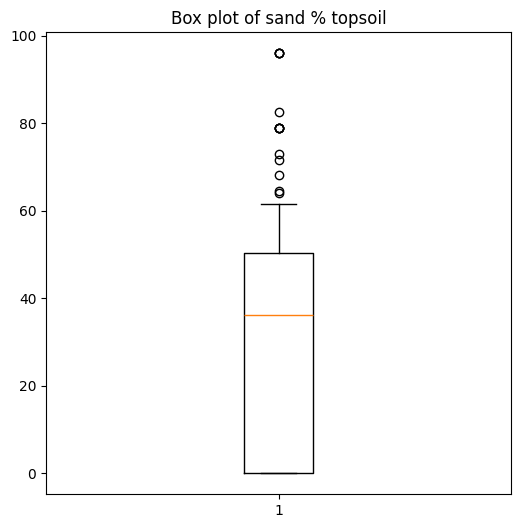

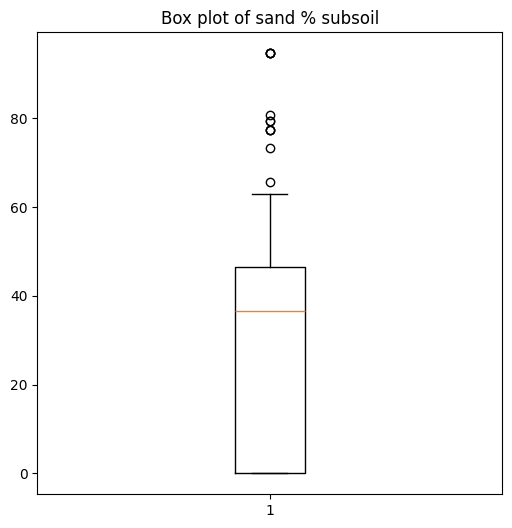

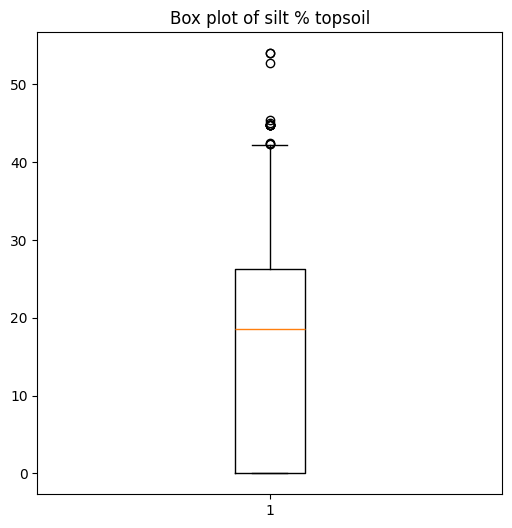

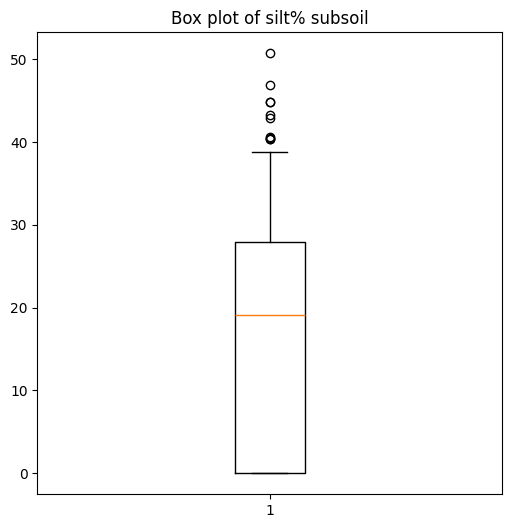

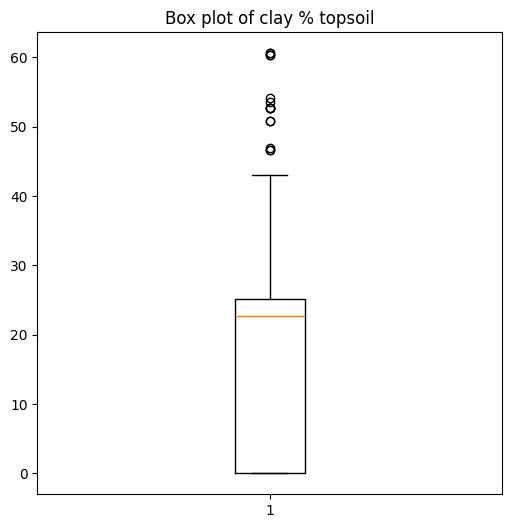

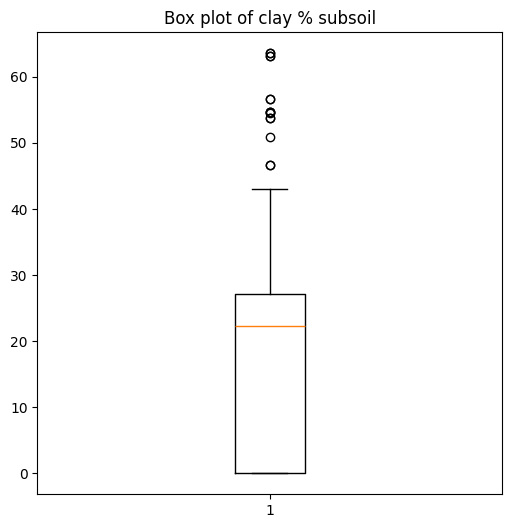

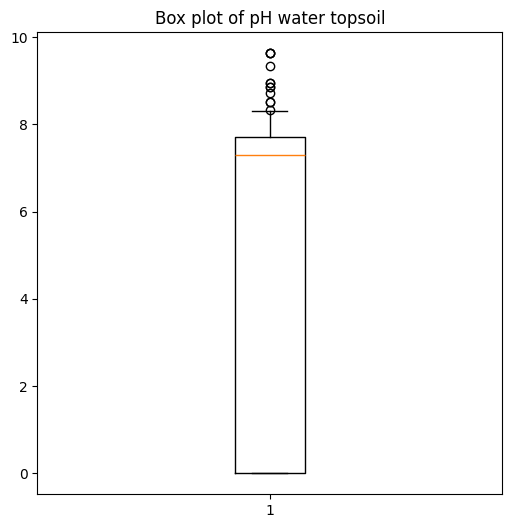

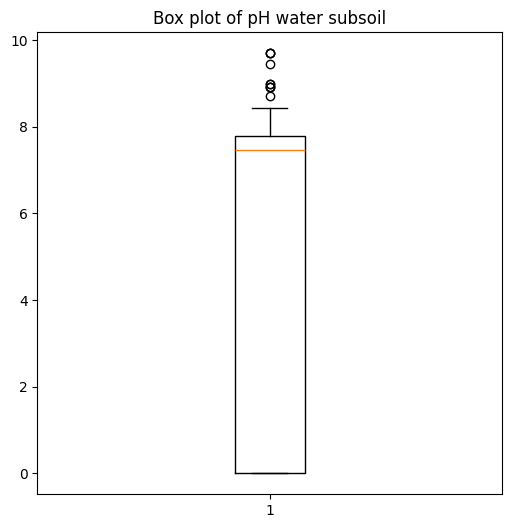

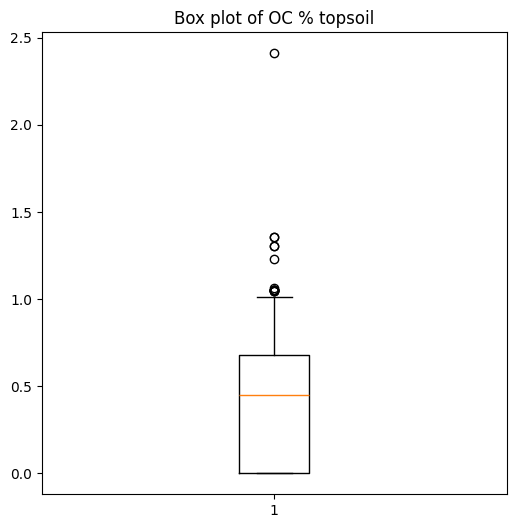

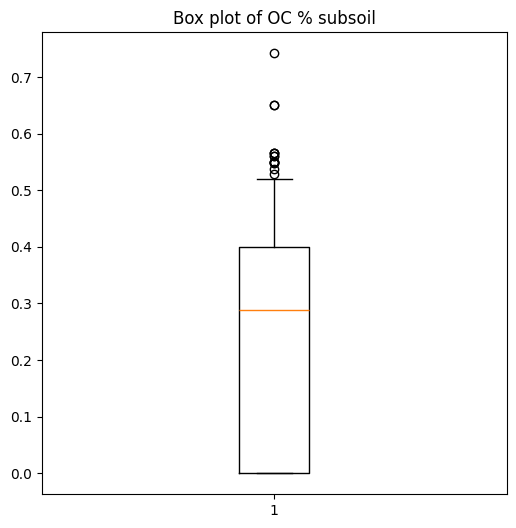

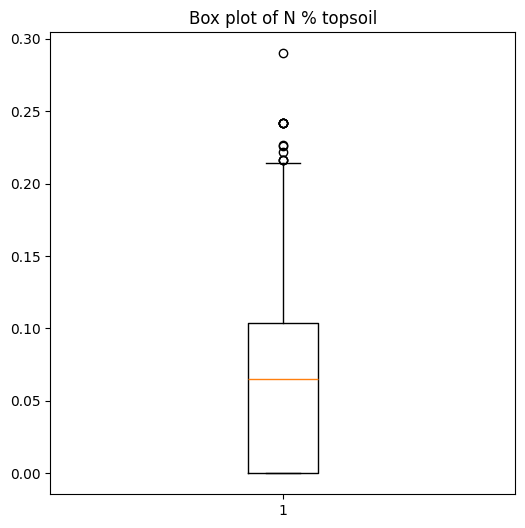

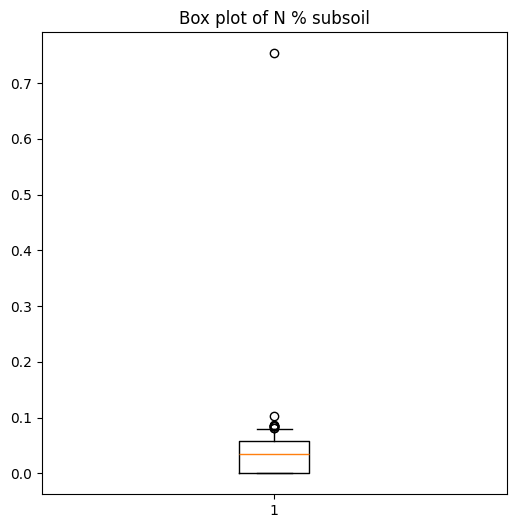

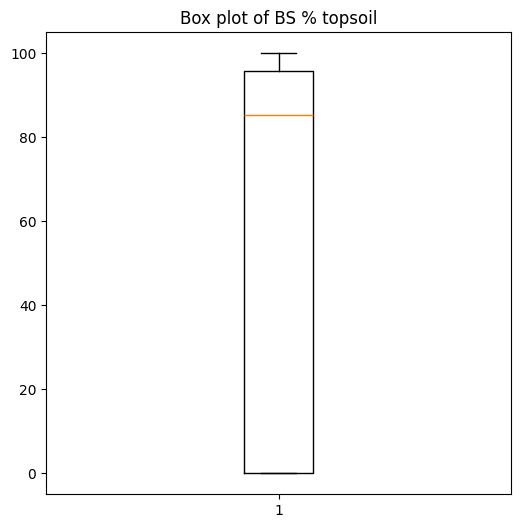

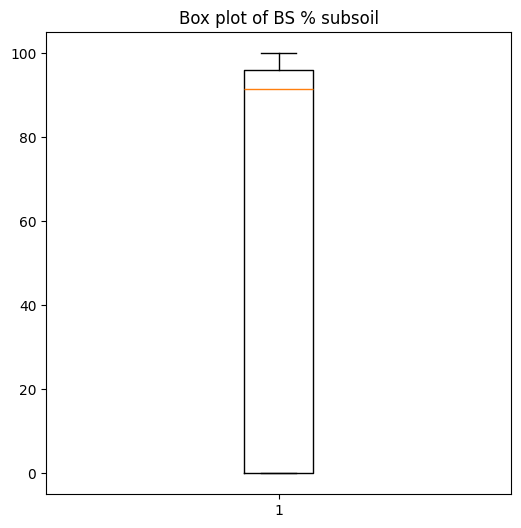

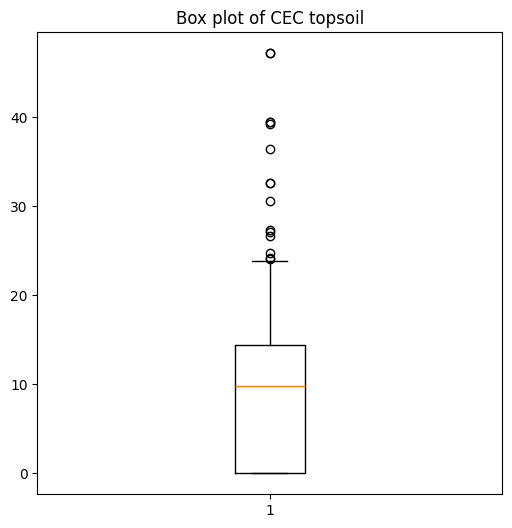

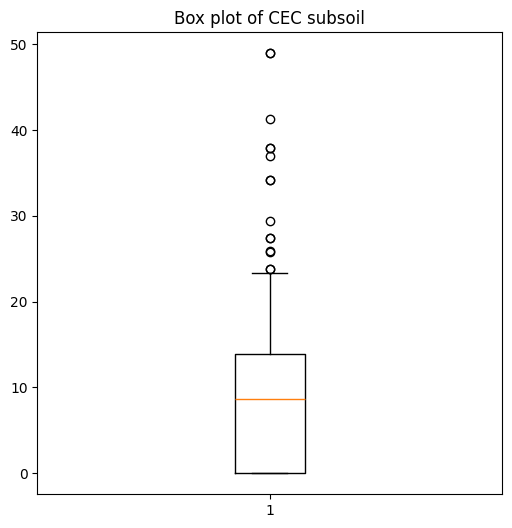

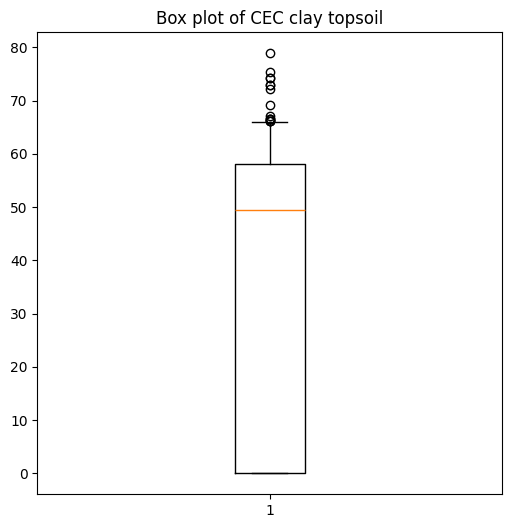

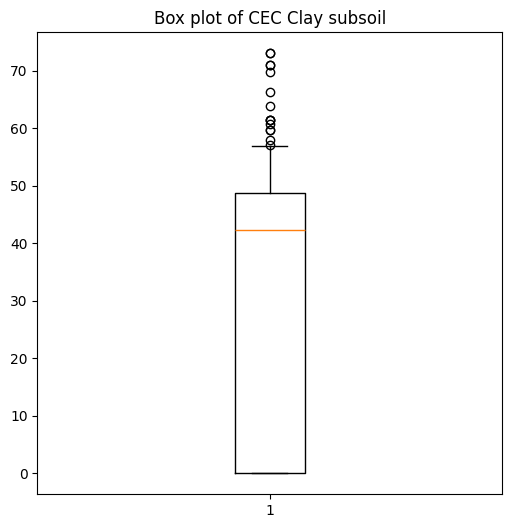

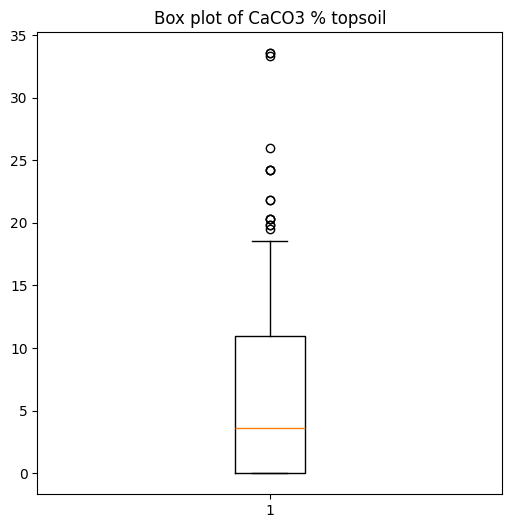

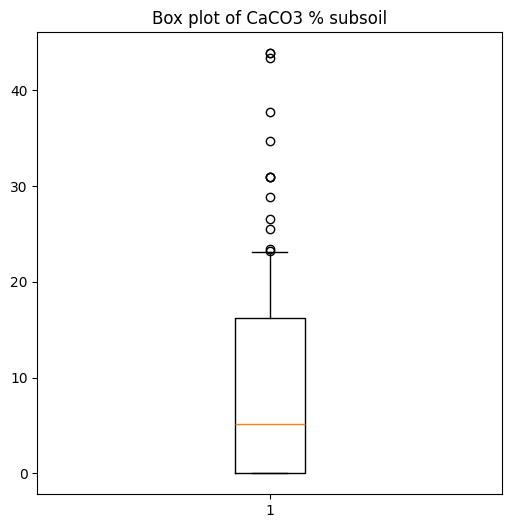

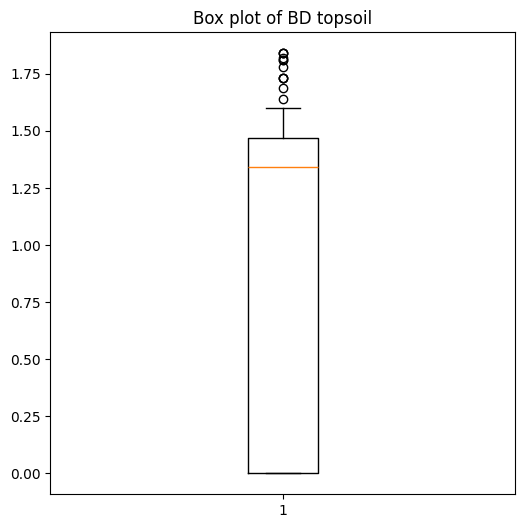

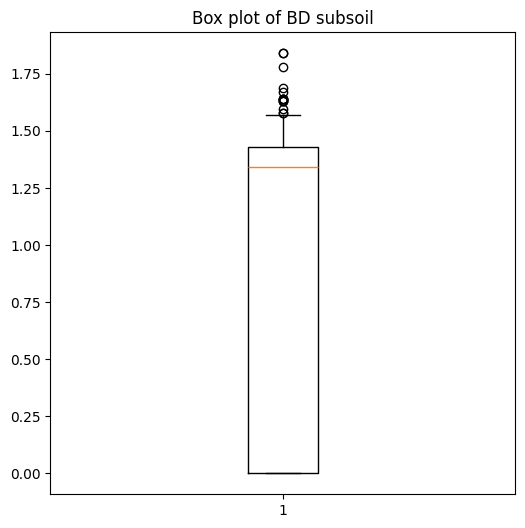

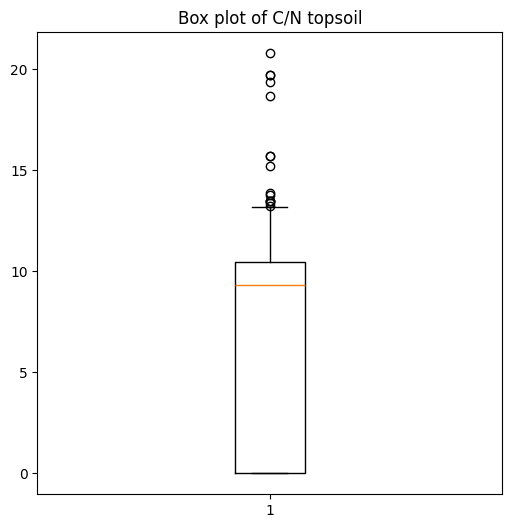

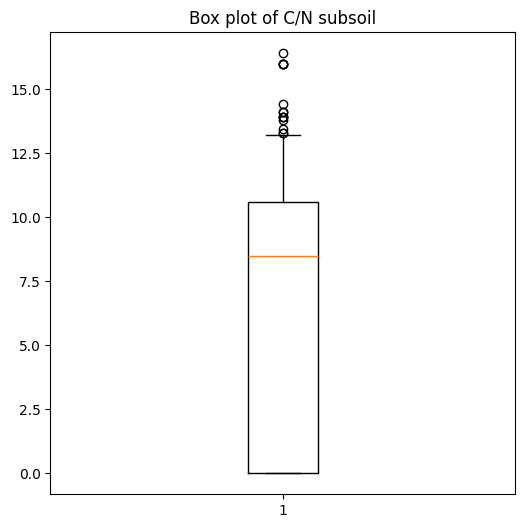

In [8]:
# box plot of each numerical value
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.boxplot(df_soil[column], whis=[5, 95])
        plt.title(f"Box plot of {column}")
        plt.show()


### 5. Histogramme displys: 

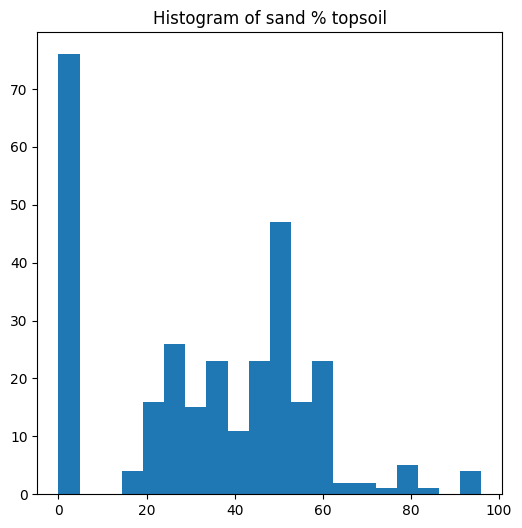

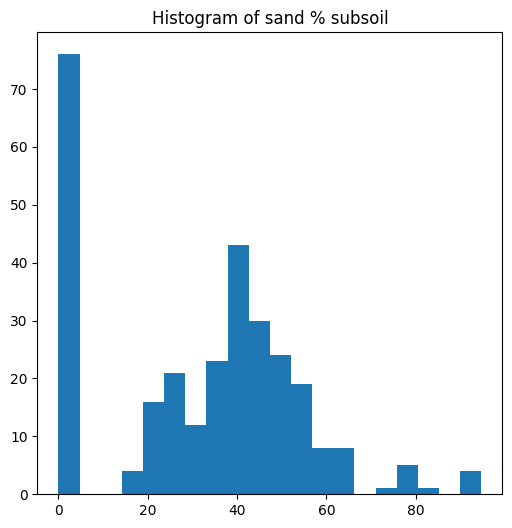

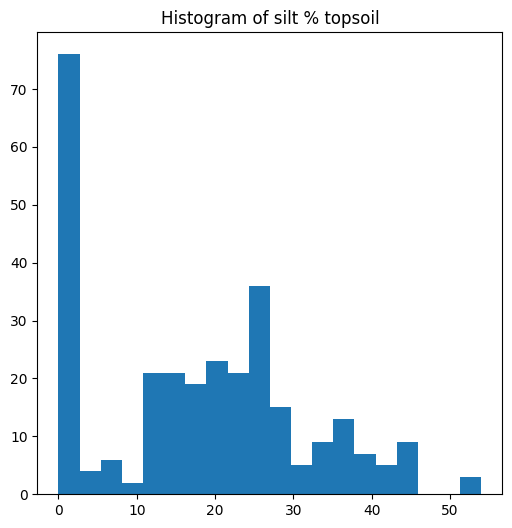

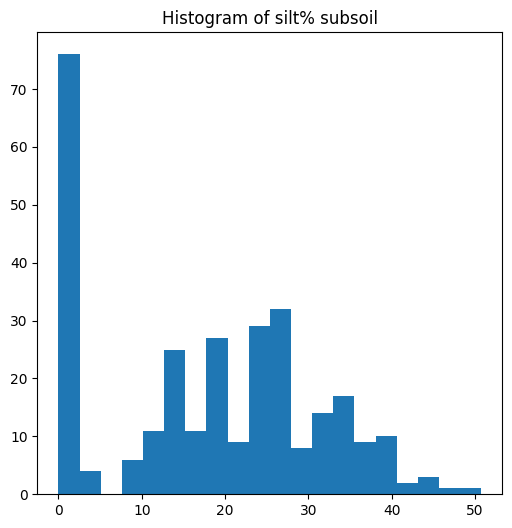

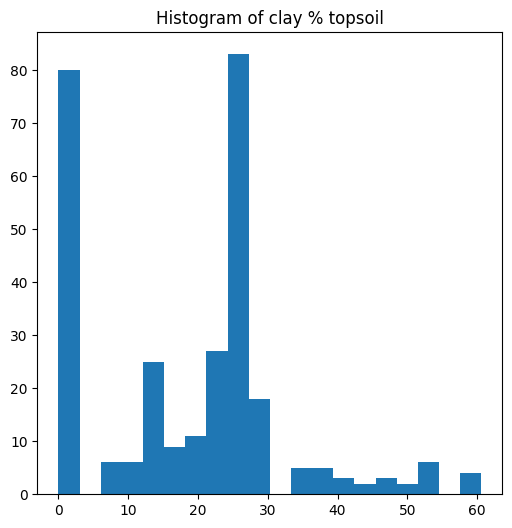

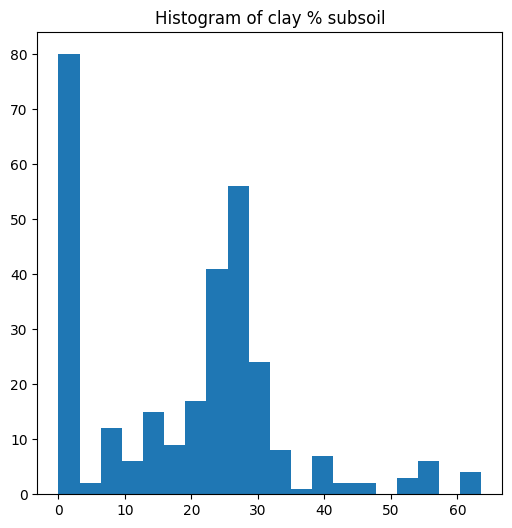

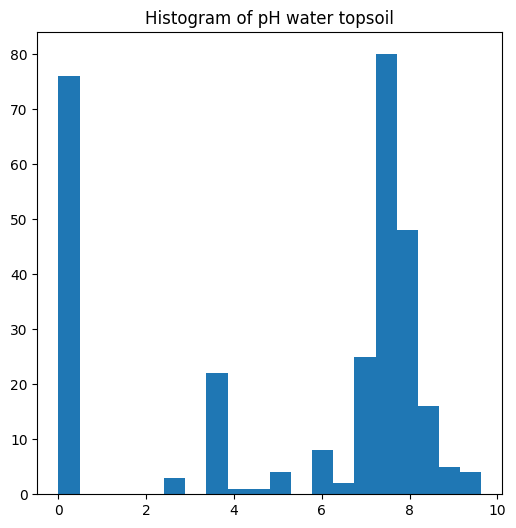

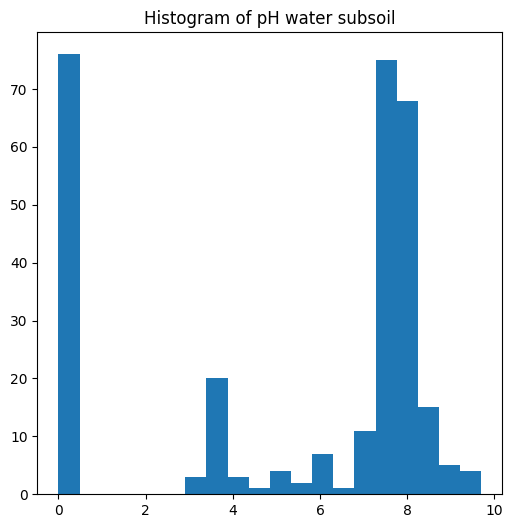

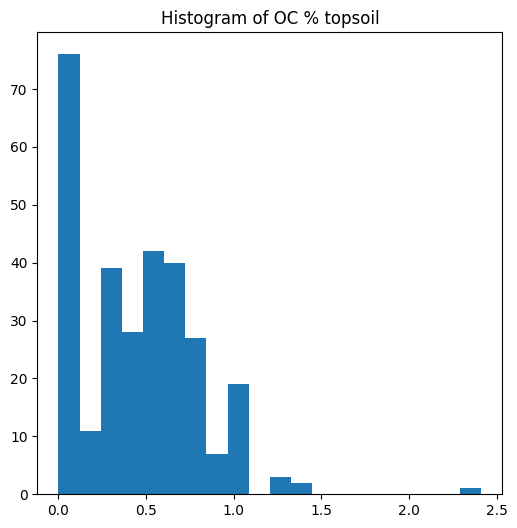

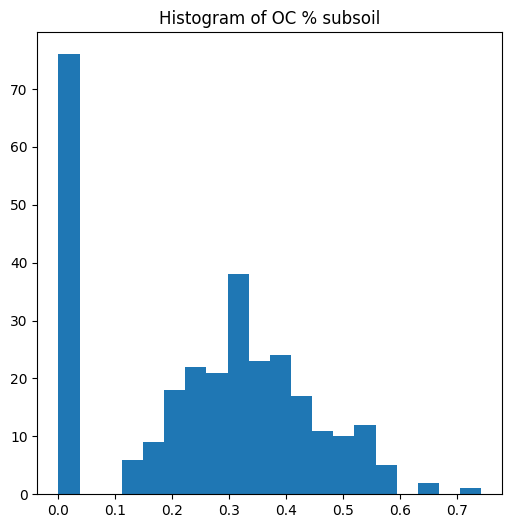

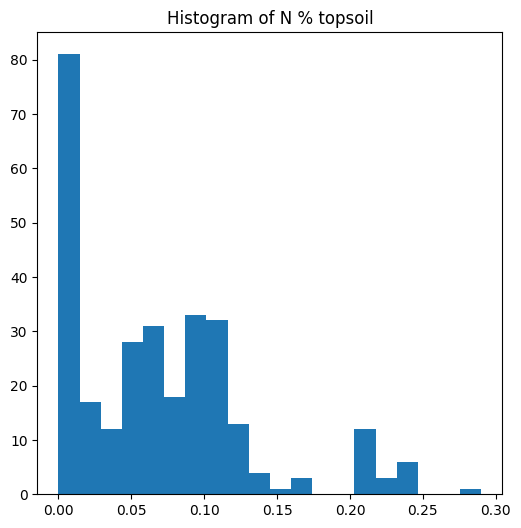

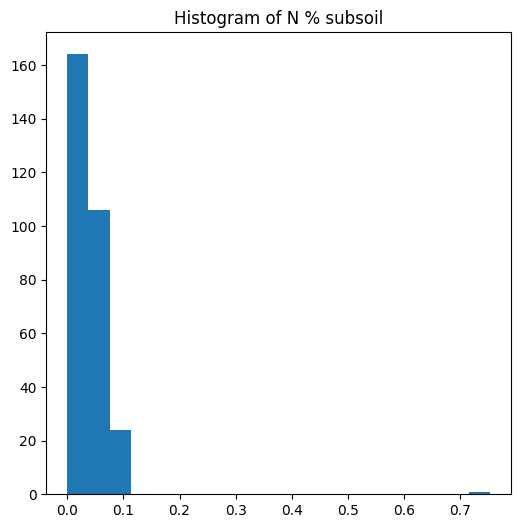

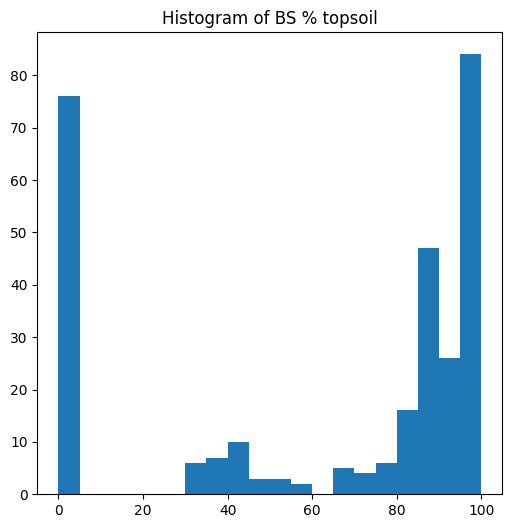

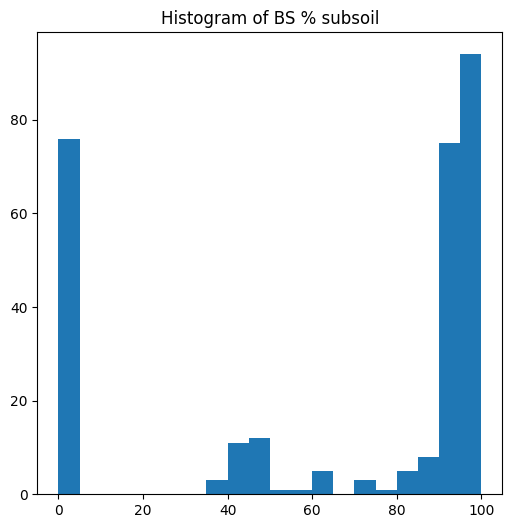

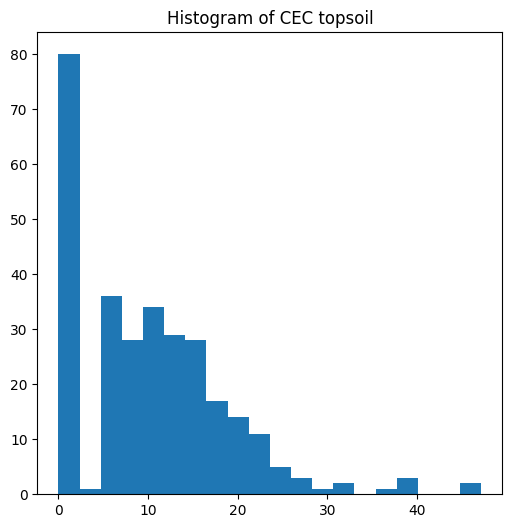

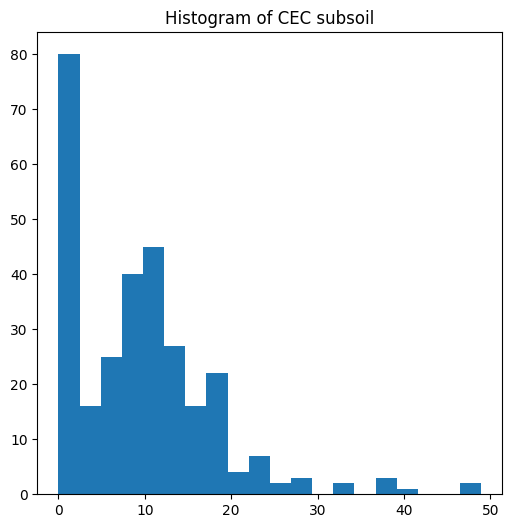

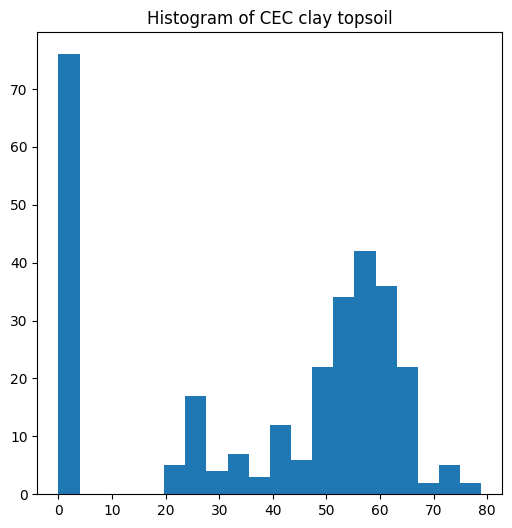

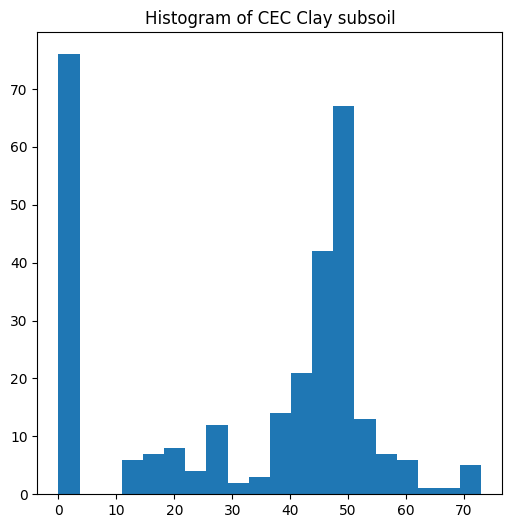

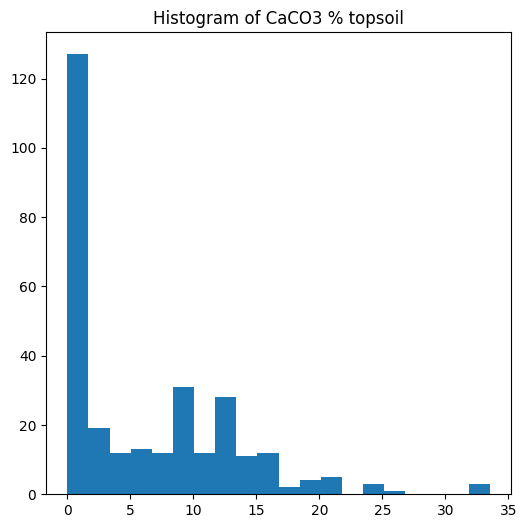

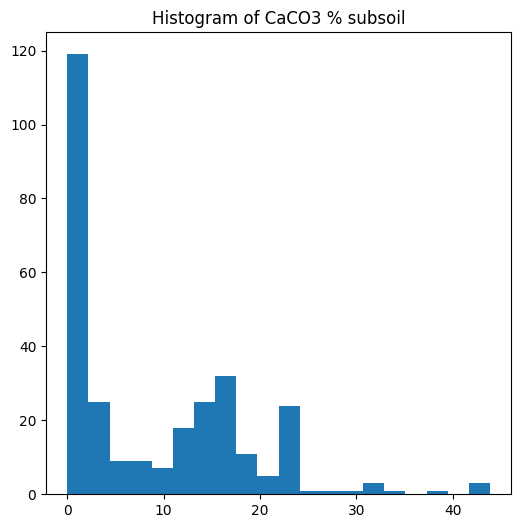

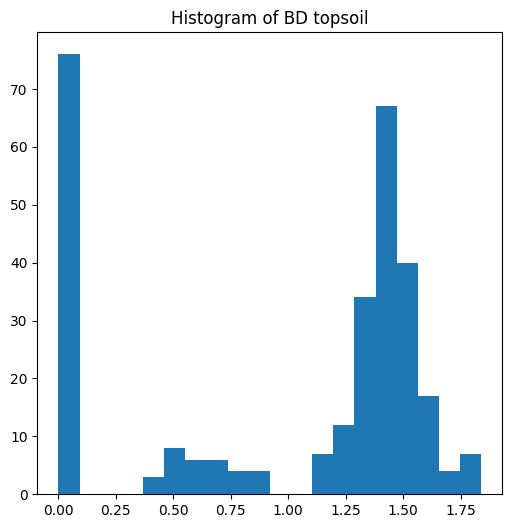

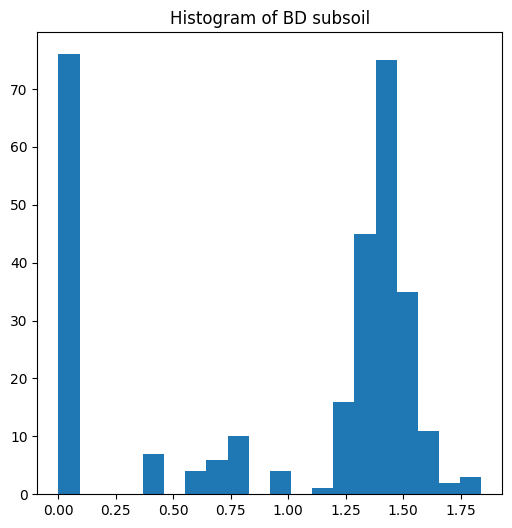

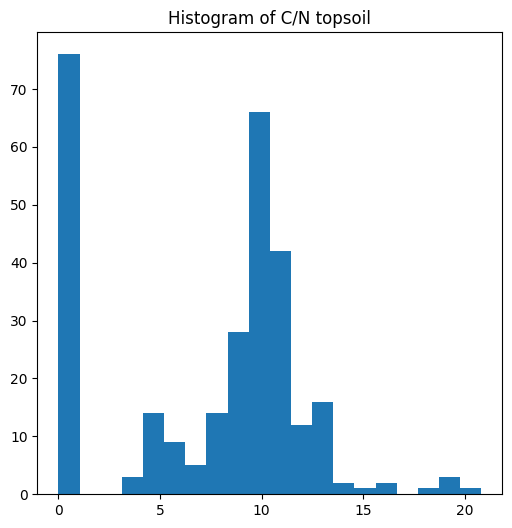

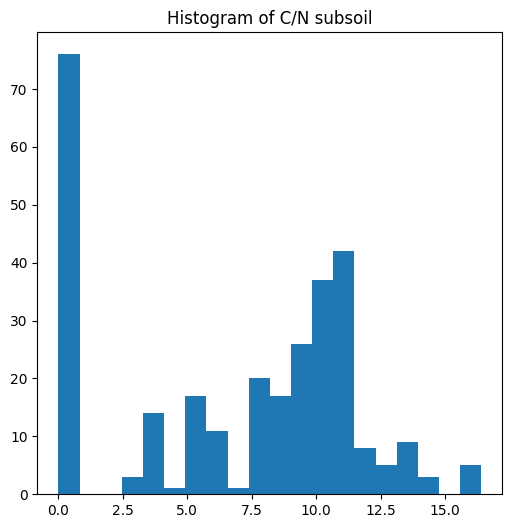

In [9]:
for column in df_soil.columns:
    if df_soil[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.hist(df_soil[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.show()

b. Scatter plot for data

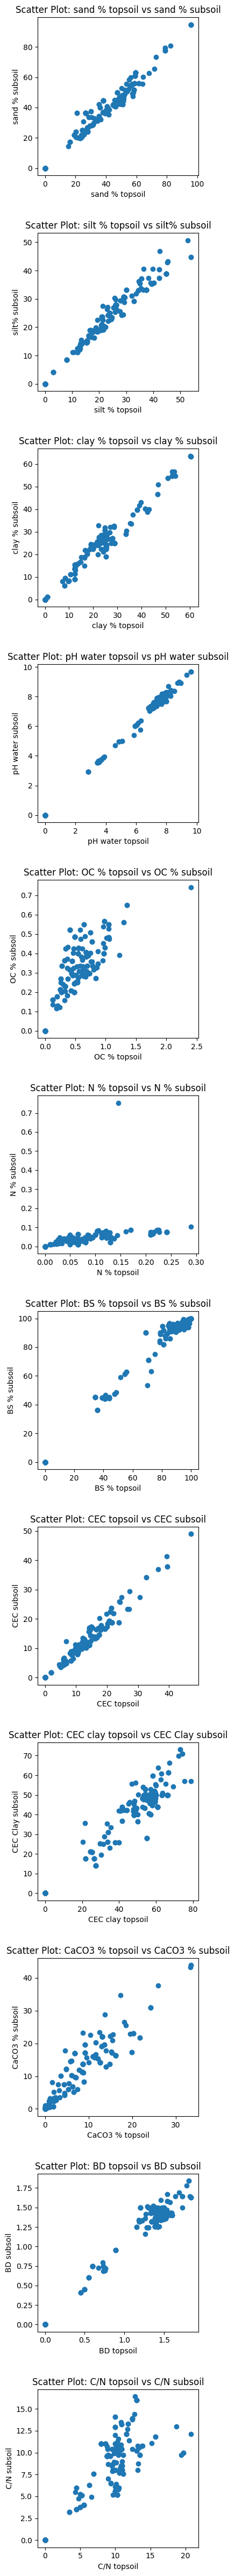

In [41]:
top_soil = ['sand % topsoil', 'silt % topsoil','clay % topsoil',  'pH water topsoil','OC % topsoil',  'N % topsoil',
        'BS % topsoil', 'CEC topsoil','CEC clay topsoil','CaCO3 % topsoil',  'BD topsoil', 'C/N topsoil']
sub_soil =['sand % subsoil','silt% subsoil', 'clay % subsoil', 'pH water subsoil',  'OC % subsoil','N % subsoil',
        'BS % subsoil','CEC subsoil', 'CEC Clay subsoil','CaCO3 % subsoil',  'BD subsoil','C/N subsoil']
fig, axes = plt.subplots(nrows=len(top_soil), ncols=1, figsize=(4, 4 * len(top_soil)))
for i in range(len(top_soil)):
        col1 = top_soil[i]
        col2 = sub_soil[i]
        axes[i].scatter(df_soil[col1],df_soil[col2])
        axes[i].set_xlabel(col1)
        axes[i].set_ylabel(col2)
        axes[i].set_title(f'Scatter Plot: {col1} vs {col2}')
plt.tight_layout(h_pad=3, w_pad=1.5)  
plt.show()

We can deduct that there is a positove correlaction between them , a strong one for example sand% , silt% , clay% , ph , caco3 , N% ...etc and some other less strong like OC% and C/N

Now we need to visualize the relation between each attribute and other attribute (for example and and other components in top soil) best solution for this ? HeatMap for sure haha

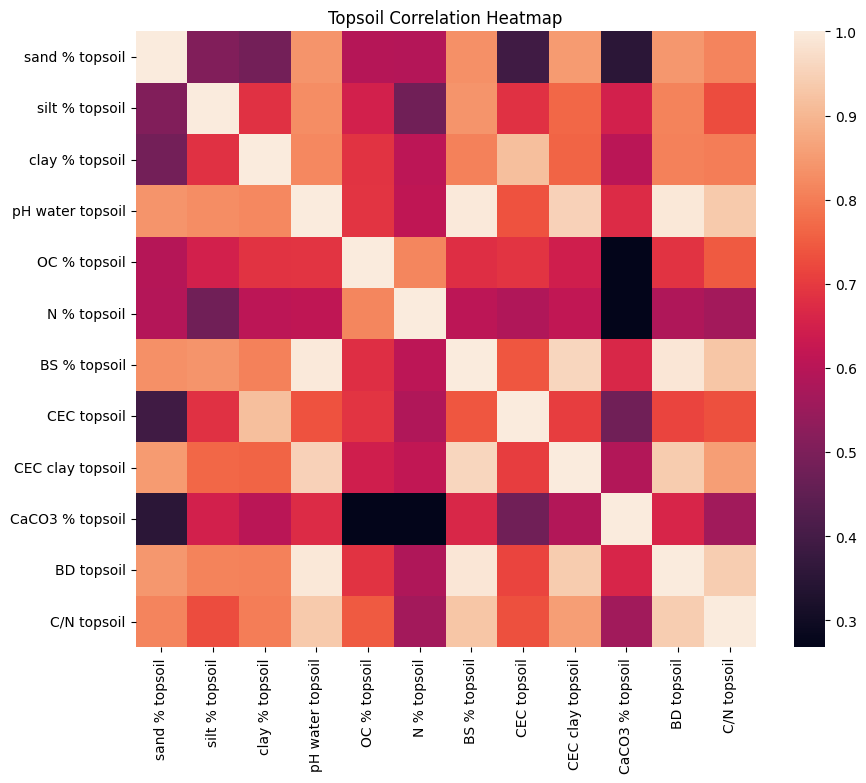

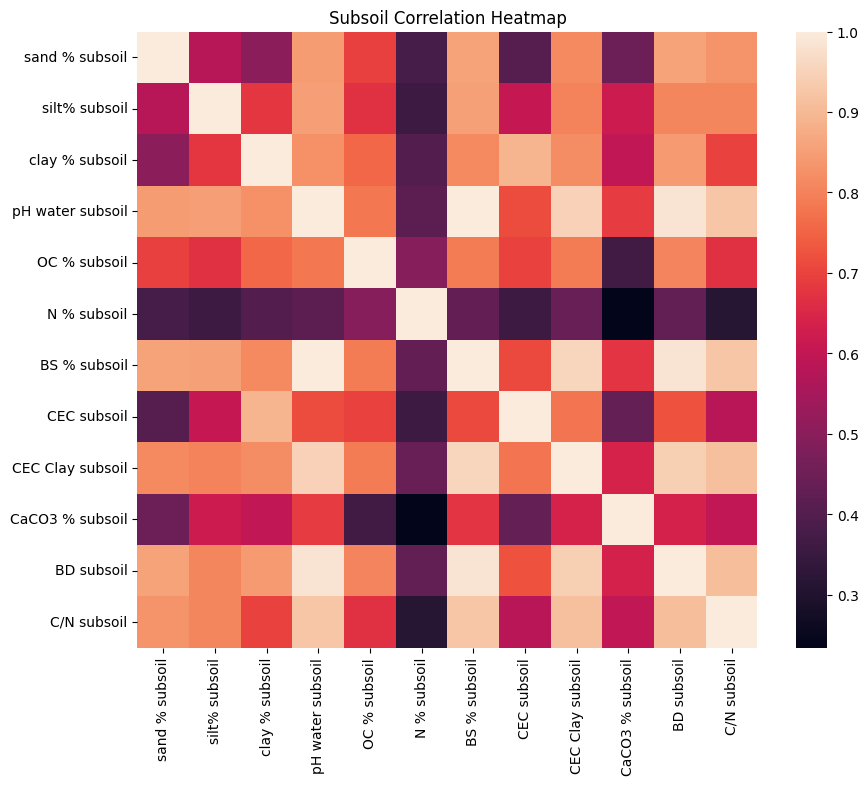

In [5]:
df_topsoil = df_soil.drop(columns=sub_soil).drop(columns=["geometry" , "CNT_FULLNAME"])
df_subsoil = df_soil.drop(columns=top_soil).drop(columns=["geometry" , "CNT_FULLNAME"])
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
p1 = sns.heatmap(df_topsoil.corr())
plt.title('Topsoil Correlation Heatmap')
plt.show()


plt.figure(figsize=(10, 8))  # Adjust figure size as needed
p2 = sns.heatmap(df_subsoil.corr())
plt.title('Subsoil Correlation Heatmap')
plt.show()

from here we can get information about correlation between diffrent attribute like : BS and PH in both top soil and sub soil and small correlation between BD and PH ( i believe we can't really delete one of this attribute)

# A. Data manipulation (climat data)

### 1.2. Extarct Algeria's polygone 


In [3]:
def extract_shapefile_data(shapefile_path):
    try:
        sf = shapefile.Reader(shapefile_path)
        fields = sf.fields[1:] 
        records = sf.records()
        shapes = sf.shapes()

        data = []
        for i in range(len(shapes)):
            record = records[i]
            shape = shapes[i]
            feature_data = dict(zip([f[0] for f in fields], record))

            # Handle different geometry types:
            if shape.shapeTypeName == "POINT":
                feature_data["geometry"] = {"type": "Point", "coordinates": shape.points[0]}
            elif shape.shapeTypeName == "POLYLINE":
                feature_data["geometry"] = {"type": "LineString", "coordinates": shape.points}
            elif shape.shapeTypeName == "POLYGON":
                feature_data["geometry"] = {"type": "Polygon", "coordinates": [shape.points]} 
            elif shape.shapeTypeName == "MULTIPOINT":
                feature_data["geometry"] = {"type": "MultiPoint", "coordinates": shape.points}
            elif shape.shapeTypeName == "MULTIPATCH":
                feature_data["geometry"] = {"type": "MultiPolygon", "coordinates": shape.points} 
            else:
                feature_data["geometry"] = {"type": "Unknown", "coordinates": None}

            data.append(feature_data)
        return data

    except Exception as e:
        print(f"Error reading shapefile: {e}")
        return None
shapefile_path = "Country/Country.shp"
dataset = extract_shapefile_data(shapefile_path)

#add it to a text file to understand the format
"""with open("result.txt" , "w" , encoding="UTF8") as file:
    for i in dataset:
        file.write(str(i)+"\n\n\n\n")"""

'with open("result.txt" , "w" , encoding="UTF8") as file:\n    for i in dataset:\n        file.write(str(i)+"\n\n\n\n")'

shp file : are the files who containe the name of the Countries and the gemoetry of it reperesented as polygone of points 

In [4]:
# extract data about tizi ouezou 
with open("result.txt" , "w" , encoding="UTF8") as file:
    for i in dataset : 
        if i["CNTRY_NAME"]=="Algeria":
            file.write(str(i)+"\n\n\n\n")
            df_country = i
            break #get only the first one
df_country


{'AREA': 213.434727222,
 'PERIMETER': 73.4355695603,
 'CNT1M_1_': 12824,
 'CNT1M_1_ID': 11914,
 'FAO_NAME': 'Algeria',
 'FAO_CODE': 4,
 'UN_CODE': 12,
 'ISO_CODE': 'DZ',
 'CNTRY_NAME': 'Algeria',
 'ISO3_CODE': 'DZA',
 'geometry': {'type': 'Polygon',
  'coordinates': [[(7.5183162689209, 37.0362396240234),
    (7.5273609161377, 37.0252532958984),
    (7.53467607498169, 37.0205574035645),
    (7.54997682571411, 37.0107307434082),
    (7.55525875091553, 37.0007858276367),
    (7.59655618667603, 36.9762115478516),
    (7.61074781417847, 36.9713172912598),
    (7.62482213973999, 36.969165802002),
    (7.63160514831543, 36.9707183837891),
    (7.64247608184814, 36.9700889587402),
    (7.6534948348999, 36.9795455932617),
    (7.65644979476929, 36.9839782714844),
    (7.65844917297363, 36.982666015625),
    (7.65776300430298, 36.9798889160156),
    (7.66192483901978, 36.9758682250977),
    (7.67256784439087, 36.9738540649414),
    (7.67612218856812, 36.9776153564453),
    (7.67987489700317, 36.

for the dbf file is a set of descriptive infos about the data of shp file (its easy to understand so ne need to exploit this file) , same for shx file its kinda an index for fast access to .shp file that we don't really need it ( ig we will in case we want to ptimize the code to extract the Algeria info faster ...) same for .prj file

### 1.3. Combine soil and Country to get only data about Algeria in Climat

In [16]:
polygon = df_country["geometry"]["coordinates"][0]
polygon

[(7.5183162689209, 37.0362396240234),
 (7.5273609161377, 37.0252532958984),
 (7.53467607498169, 37.0205574035645),
 (7.54997682571411, 37.0107307434082),
 (7.55525875091553, 37.0007858276367),
 (7.59655618667603, 36.9762115478516),
 (7.61074781417847, 36.9713172912598),
 (7.62482213973999, 36.969165802002),
 (7.63160514831543, 36.9707183837891),
 (7.64247608184814, 36.9700889587402),
 (7.6534948348999, 36.9795455932617),
 (7.65644979476929, 36.9839782714844),
 (7.65844917297363, 36.982666015625),
 (7.65776300430298, 36.9798889160156),
 (7.66192483901978, 36.9758682250977),
 (7.67256784439087, 36.9738540649414),
 (7.67612218856812, 36.9776153564453),
 (7.67987489700317, 36.9765663146973),
 (7.68263101577759, 36.9720497131348),
 (7.69228410720825, 36.9663391113281),
 (7.69731998443604, 36.9687614440918),
 (7.70018005371094, 36.9686050415039),
 (7.70207595825195, 36.9571914672852),
 (7.70446920394897, 36.9545021057129),
 (7.7112717628479, 36.9555931091309),
 (7.72080326080322, 36.95973587

In [11]:
polygon = df_country["geometry"]["coordinates"][0]
max_x =polygon[0][0]
min_x =polygon[0][0]
max_y =polygon[0][1]
min_y =polygon[0][1]
for i in polygon : 
    max_x = max(max_x , i[0])
    min_x = min(min_x , i[0])
    max_y = max(max_y , i[1])
    min_y = min(min_y , i[1])
print(str(max_x) ,str(min_x) , str(max_y) ,str(min_y) )

11.9795484542847 -8.67386722564697 37.0937347412109 18.9600276947021


functions returns if a polygone is inside another polygon

In [9]:
def intersects(p1, p2, p3):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3

    if x2 == x3:
        return (x2 >= x1 and min(y2, y3) <= y1 <= max(y2, y3))

    if y2 == y3:
        return (y2 == y1 and min(x2, x3) <= x1 <= max(x2, x3))

    if (y2 <= y1 < y3 or y3 <= y1 < y2) and \
            x1 < (x3 - x2) * (y1 - y2) / (y3 - y2) + x2:
        return True
    else:
        return False


def is_point_inside(point, polygon):
    x, y = point
    intersections = 0
    for i in range(len(polygon)):
        p2 = polygon[i]
        p3 = polygon[(i + 1) % len(polygon)] 
        if intersects((x,y), p2, p3):
            intersections += 1
    return intersections % 2 == 1

def is_polygon_inside(smaller_polygon, larger_polygon):
    for vertex in smaller_polygon:
        if is_point_inside(vertex, larger_polygon):
            return True
    return False
larger_polygon = df_country["geometry"]["coordinates"][0]
for i in df_soil["geometry"] : 
    try : 
        polygon = wkt.loads(i)
        cords = list(polygon.exterior.coords)
        smaller_polygon = cords
        inside = is_polygon_inside(smaller_polygon, larger_polygon)
    except Exception as e : 
        print(list(polygon.exterior.coords))
        continue

[(-1.6424700021743774, 34.68141174316406), (-1.6514999866485596, 34.66817855834961), (-1.6766899824142456, 34.63359069824219), (-1.7077200412750244, 34.6137809753418), (-1.786520004272461, 34.599510192871094), (-1.8058500289916992, 34.601219177246094), (-1.81427001953125, 34.611351013183594), (-1.7610900402069092, 34.687870025634766), (-1.756700038909912, 34.68843078613281), (-1.7529100179672241, 34.679630279541016), (-1.7345499992370605, 34.678260803222656), (-1.7070499658584595, 34.676239013671875), (-1.6424700021743774, 34.68141174316406)]
[(9.578709602355957, 30.23147964477539), (9.50158977508545, 30.20046043395996), (9.455140113830566, 30.170520782470703), (9.413350105285645, 30.15382957458496), (9.36421012878418, 30.11713981628418), (9.335049629211426, 30.081300735473633), (9.31406021118164, 30.0385799407959), (9.316679954528809, 30.001190185546875), (9.363519668579102, 29.958940505981445), (9.398460388183594, 29.97100067138672), (9.481300354003906, 30.017419815063477), (9.509090

### 1.4 Extract all climat files and save only the data that is inside TIZI OUZOU (using lat and lon)

In [ ]:
filepath = "Climate-DATA"
variables = ['PSurf', 'Wind', 'Qair', 'Tair', 'Snowf', 'Rainf']
output_filename = "output.csv"

def extract_data(filepath, base_filename, variables):
    data = {}
    time = None
    lat = None
    lon = None
    base_filename = "_".join(base_filename.split("_")[1:])
    for var in variables:
        filename = f"{var}_{base_filename}" 
        full_path = os.path.join(filepath, filename)
        try:
            dataset = netCDF4.Dataset(full_path, 'r')
            if time is None:
                time = netCDF4.num2date(dataset.variables['time'][:], dataset.variables['time'].units)
                lat = dataset.variables['lat'][:]
                lon = dataset.variables['lon'][:]
            data[var] = dataset.variables[var][:]
            dataset.close()
        except (FileNotFoundError, KeyError, OSError) as e:
            print(f"Error processing {filename}: {e}. Filling with NaN.")
            if time is None:
                print("Missing essential file, skipping this iteration.")
                return None, None, None, None
            data[var] = np.nan * np.ones(data['PSurf'].shape)
    return time, lat, lon, data

try:
    df = pd.DataFrame()
    for filename in os.listdir(filepath):
        if "PSurf" in filename:
            base_filename = filename
            time, lat, lon, data = extract_data(filepath, base_filename, variables)
            if data is None:
                print("skipped")
                continue
            print("passed")
            index = pd.MultiIndex.from_product([time, lat, lon], names=['time', 'lat', 'lon'])
            temp_df = pd.DataFrame(index=index)
            for var, val in data.items():
                temp_df[var] = val.flatten()
            temp_df = temp_df[
                (temp_df.index.get_level_values('lat') >= min_x) &
                (temp_df.index.get_level_values('lat') <= max_x) &
                (temp_df.index.get_level_values('lon') >= min_y) &
                (temp_df.index.get_level_values('lon') <= max_y)
            ]
            df = pd.concat([df, temp_df])
    df.fillna(0, inplace=True)
    df.to_csv(output_filename)
    print(f"Data written to {output_filename}")

except Exception as e:
    print(f"An error occurred: {e}")

print("Done")

passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
passed
Data written to output.csv
Done


### 1. data import and visualise

Trying to extends relations between attributes

In [ ]:
# here we are importing the dataset that extract algeria as a square 
from shapely.geometry import Point, Polygon
df_climat = pd.read_csv("output.csv")

our goal here will be reprocess the old data to extract only points inside algeria's polygone

In [ ]:
for i in range(0 , len(df_climat) , 1000000):
    polygon = Polygon(df_country["geometry"]["coordinates"][0])
    count=0 # used to track dataset processing 
    bool_arr = []
    for  lat, lon in zip(df_climat_sample['lat'], df_climat_sample['lon']):
        point = Point(lat, lon) 
        bool_arr.append(polygon.contains(point))
        print(count)
        count+=1
    df_climat_sample = df_climat_sample[bool_arr]
    df_climat_sample.to_csv("finals.csv" , mode="a" , index=False , header=False)
    n = len(bool_arr)

import the result data set or the cleaned dataset

In [5]:
df_climat_sample = pd.read_csv("finals.csv")
df_climat_sample

,time,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,2019-01-01 00:00:00,-8.25,27.25,89899.380,1.157487,0.014800,292.66270,0.0,0.000023
1,2019-01-01 00:00:00,-8.25,27.75,88171.805,1.316411,0.014242,291.44745,0.0,0.000000
2,2019-01-01 00:00:00,-8.25,28.25,89225.740,1.004880,0.015351,292.43445,0.0,0.000076
3,2019-01-01 00:00:00,-8.25,28.75,89687.410,0.601725,0.015769,293.01035,0.0,0.000186
4,2019-01-01 00:00:00,-7.75,27.25,92976.305,1.242354,0.016617,294.42303,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
7498555,2019-12-31 23:00:00,10.75,24.25,94920.160,2.886540,0.002458,292.23990,0.0,0.000000
7498556,2019-12-31 23:00:00,11.25,23.25,94242.984,3.429666,0.002258,290.26434,0.0,0.000000
7498557,2019-12-31 23:00:00,11.25,23.75,94301.290,3.212981,0.002293,291.02036,0.0,0.000000
7498558,2019-12-31 23:00:00,11.25,24.25,94672.484,3.119326,0.002496,292.81845,0.0,0.000000


### 2. full description : 

Full definition 
This dataset contains hourly meteorological data for Algeria during 2019, encompassing surface pressure, rainfall, snowfall, air temperature, specific humidity, and wind speed/vector. Visual analysis reveals negligible snowfall throughout the year. The average accumulated values for air temperature, wind speed, and surface pressure across the four seasons 

### 3. Update/delete un instance

In [14]:
index_to_delete = int(input("choose the instance index to delete or update: ")) 
method = input("chose wthe opeartion (delete or update) ")
if method == "delete":
    df_climat_sample = df_climat_sample.drop(index_to_delete , axis =0)
elif method == "update":
    column = input("choose the column to update : ")
    print(f"{df_climat_sample.loc[index_to_delete]}")
    if df_climat_sample[column].dtype in ["float64"]:
        df_climat_sample.loc[index_to_delete, column] = float(input("Enter new value"))
    else : 
        df_climat_sample.loc[index_to_delete, column] = input("Enter new value")
print(f"{df_climat_sample.loc[index_to_delete]}")

time     2019-01-01 00:00:00
lat                    -8.25
lon                    28.25
PSurf               89225.74
Wind                 1.00488
Qair                0.015351
Tair               292.43445
Snowf                    0.0
Rainf               0.000076
Name: 2, dtype: object
time     2019-01-01 00:00:00
lat                    -8.25
lon                    28.25
PSurf                  106.0
Wind                 1.00488
Qair                0.015351
Tair               292.43445
Snowf                    0.0
Rainf               0.000076
Name: 2, dtype: object


# B. Data Analytics

### 1. Central tendecy

In [3]:
df_climat_sample=pd.read_csv("finals.csv")
df_climat_sample

,time,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,2019-01-01 00:00:00,-8.25,27.25,89899.380,1.157487,0.014800,292.66270,0.0,0.000023
1,2019-01-01 00:00:00,-8.25,27.75,88171.805,1.316411,0.014242,291.44745,0.0,0.000000
2,2019-01-01 00:00:00,-8.25,28.25,89225.740,1.004880,0.015351,292.43445,0.0,0.000076
3,2019-01-01 00:00:00,-8.25,28.75,89687.410,0.601725,0.015769,293.01035,0.0,0.000186
4,2019-01-01 00:00:00,-7.75,27.25,92976.305,1.242354,0.016617,294.42303,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
7498555,2019-12-31 23:00:00,10.75,24.25,94920.160,2.886540,0.002458,292.23990,0.0,0.000000
7498556,2019-12-31 23:00:00,11.25,23.25,94242.984,3.429666,0.002258,290.26434,0.0,0.000000
7498557,2019-12-31 23:00:00,11.25,23.75,94301.290,3.212981,0.002293,291.02036,0.0,0.000000
7498558,2019-12-31 23:00:00,11.25,24.25,94672.484,3.119326,0.002496,292.81845,0.0,0.000000


In [4]:
print(f"Taille du Dataset: {len(df_climat_sample)}")
nb_null = 0
for column in df_climat_sample.columns:
    if df_climat_sample[column].dtype in ['float64', 'int64']:
        mean_value = df_climat_sample[column].mean()
        median_value = df_climat_sample[column].median()
        mode_value = df_climat_sample[column].mode()
        nb_null = 0
        for val in df_climat_sample[column]:
            if np.isnan(val):
                nb_null += 1
        print(f"Mean of {column}: {mean_value} /  Median of {column}: {median_value} / Number of Mode values for  {column}: {len(mode_value)}")
        for val in mode_value:
          if mean_value == median_value == val:
             sym = True
          else:
            sym = False
        if sym:
          print("Symmetrical distribution detected !")
        else:
          print("No symmetrical distribution has been detected !")

    else:
       print(f"{column} is Non numerical column !")
       print(f"Number of Mode values for  {column} are: {len(df_climat_sample[column].mode())}")
    print(f"\nNumber of missing values in {column}: {nb_null}")
    unique_values = df_climat_sample[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print("\n\n")

Taille du Dataset: 7498560
time is Non numerical column !
Number of Mode values for  time are: 8760

Number of missing values in time: 0
Number of unique values in time: 8760



Mean of lat: 2.6985981308411215 /  Median of lat: 3.25 / Number of Mode values for  lat: 4
No symmetrical distribution has been detected !

Number of missing values in lat: 0
Number of unique values in lat: 41



Mean of lon: 28.17932242990654 /  Median of lon: 28.25 / Number of Mode values for  lon: 4
No symmetrical distribution has been detected !

Number of missing values in lon: 0
Number of unique values in lon: 36



Mean of PSurf: 92342.5243288786 /  Median of PSurf: 93809.81 / Number of Mode values for  PSurf: 1
No symmetrical distribution has been detected !

Number of missing values in PSurf: 0
Number of unique values in PSurf: 1786261



Mean of Wind: 1.7719223236115806 /  Median of Wind: 1.52724865 / Number of Mode values for  Wind: 6
No symmetrical distribution has been detected !

Number of missing

### 2. measures of dispertion

In [15]:
# measures of dispertion
for column in df_climat_sample.columns:
    if df_climat_sample[column].dtype in ['float64', 'int64']:
        min_value = df_climat_sample[column].min()
        max_value = df_climat_sample[column].max()
        # Range of values
        range_value = max_value - min_value
        # variance is the mean squared difference between each data point and the centre of the distribution measured by the mean
        variance_value = df_climat_sample[column].var()
        # standard is the square root of sum of squared deviation from the mean divided by the number of observations.
        std_value = df_climat_sample[column].std()
        # quartils
        quartiles = [df_climat_sample[column].quantile(0),df_climat_sample[column].quantile(0.25), df_climat_sample[column].median(),df_climat_sample[column].quantile(0.5), df_climat_sample[column].quantile(1)]
        # quartiles deviation is the measure of data dispertion 
        quartile_deviation = df_climat_sample[column].quantile(0.75) - df_climat_sample[column].quantile(0.25)

        print(f"Range of {column}: {range_value}")
        print(f"Variance of {column}: {variance_value}")
        print(f"Standard deviation of {column}: {std_value}")
        print(f"Quart 1 : {quartiles[0]}\n Quart 2 : {quartiles[1]}\n Quart 3: {quartiles[2]}\n Quart 4: {quartiles[3]}\n Quart 5: {quartiles[4]} ")
        print(f"Quartile deviation of {column}: {quartile_deviation}")
    print("\n\n")




Range of lat: 20.0
Variance of lat: 18.768364208885444
Standard deviation of lat: 4.332247016143636
Quart 1 : -8.25
 Quart 2 : -0.25
 Quart 3: 3.25
 Quart 4: 3.25
 Quart 5: 11.75 
Quartile deviation of lat: 6.5



Range of lon: 17.5
Variance of lon: 18.41119192827221
Standard deviation of lon: 4.290826485453847
Quart 1 : 19.25
 Quart 2 : 24.75
 Quart 3: 28.25
 Quart 4: 28.25
 Quart 5: 36.75 
Quartile deviation of lon: 6.5



Range of PSurf: 98051.695
Variance of PSurf: 15886735.41361132
Standard deviation of PSurf: 3985.8167812396146
Quart 1 : 106.0
 Quart 2 : 90323.65
 Quart 3: 93809.81
 Quart 4: 93809.81
 Quart 5: 98157.695 
Quartile deviation of PSurf: 4905.210000000006



Range of Wind: 12.329770337000001
Variance of Wind: 1.1250209167590197
Standard deviation of Wind: 1.0606700319887519
Quart 1 : 0.030631663
 Quart 2 : 1.052025225
 Quart 3: 1.5272489
 Quart 4: 1.5272489
 Quart 5: 12.360402 
Quartile deviation of Wind: 1.162116525



Range of Qair: 0.0278802971
Variance of Qair:

Deducing Outliers:

Outliers are extreme values in the dataset, that seem odd or dievrgeant form the central tendencies of the analysed data, they are rare and are mostly dur to wrong data introduction to the dataset. thus, greatly affect the central tendenices.

outliers could either be wrong typed values, or naturally odd data,  which is why deleting them isn't necessarly the right solution, they should be wisely manipulated.

We will identify the outliers based on the following rule:

- Finding the median, quartile, and interquartile regions
- Calculate 1.5*IQR below the first quartile and check for low outliers.
- Calculate 1.5*IQR above the third quartile and check for outliers.

In [16]:
for column in df_climat_sample.columns:
    if df_climat_sample[column].dtype in ['float64', 'int64']:
        Q1 = df_climat_sample[column].quantile(0.25)
        Q3 = df_climat_sample[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        outliers = df_climat_sample[(df_climat_sample[column] < lower_bound) | (df_climat_sample[column] > upper_bound)]
        print(f"Number of outliers in {column}: {len(outliers)}")
        print("\n")

Number of outliers in lat: 0


Number of outliers in lon: 0


Number of outliers in PSurf: 320867


Number of outliers in Wind: 315215


Number of outliers in Qair: 309956


Number of outliers in Tair: 46325


Number of outliers in Snowf: 0


Number of outliers in Rainf: 1399158




### 3. missing and unique values

In [17]:
for column in df_climat_sample.columns:
    unique_values = df_climat_sample[column].unique()
    print(f"Number of unique values in {column}: {len(unique_values)}")
    print(f"Nombre de valeurs nuls pour {column} est {df_climat_sample[column].isnull().sum()}")
print("\n\n")
print(f"La taille du dataset est de: {len(df_climat_sample)}")

Number of unique values in time: 8760
Nombre de valeurs nuls pour time est 0
Number of unique values in lat: 41
Nombre de valeurs nuls pour lat est 0
Number of unique values in lon: 36
Nombre de valeurs nuls pour lon est 0
Number of unique values in PSurf: 1786262
Nombre de valeurs nuls pour PSurf est 0
Number of unique values in Wind: 6419187
Nombre de valeurs nuls pour Wind est 0
Number of unique values in Qair: 4973367
Nombre de valeurs nuls pour Qair est 0
Number of unique values in Tair: 866988
Nombre de valeurs nuls pour Tair est 0
Number of unique values in Snowf: 1
Nombre de valeurs nuls pour Snowf est 0
Number of unique values in Rainf: 1377354
Nombre de valeurs nuls pour Rainf est 0



La taille du dataset est de: 7498558


### 4. box plot and define outliers

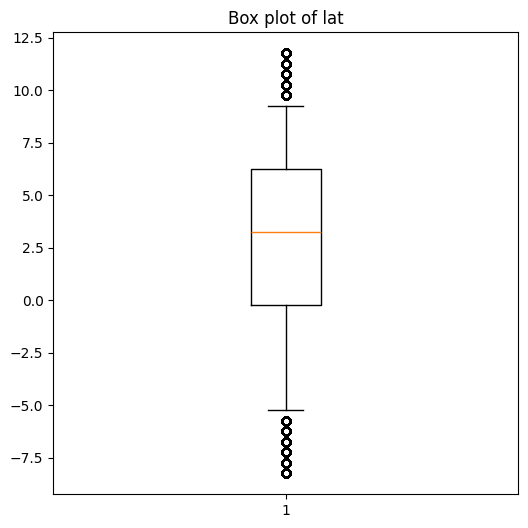

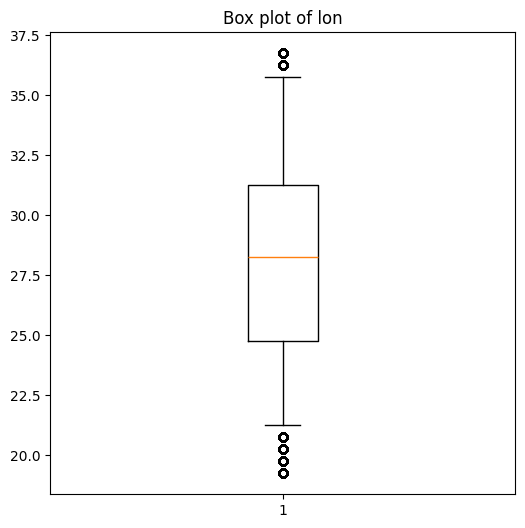

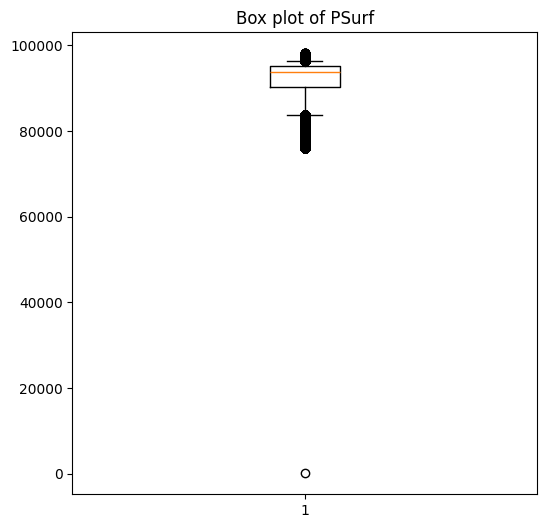

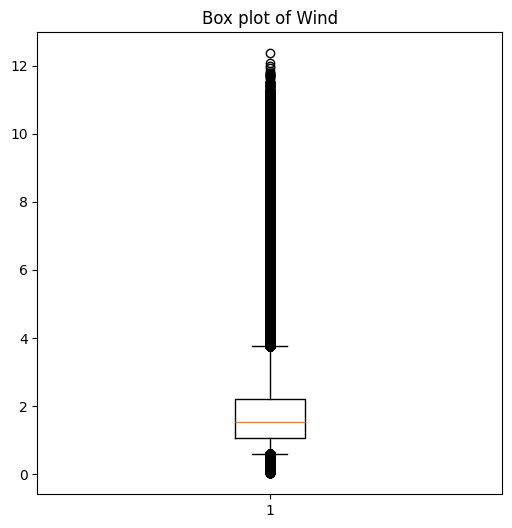

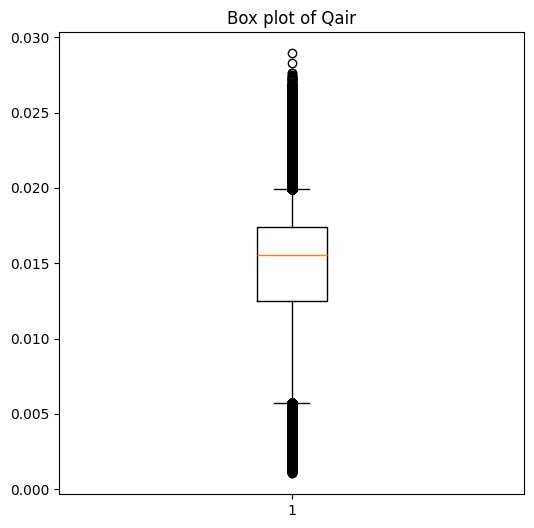

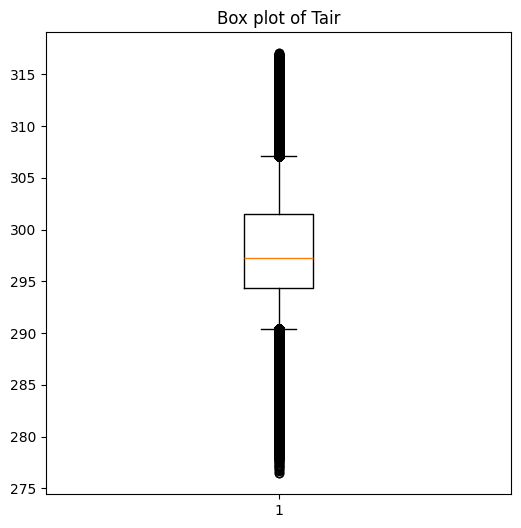

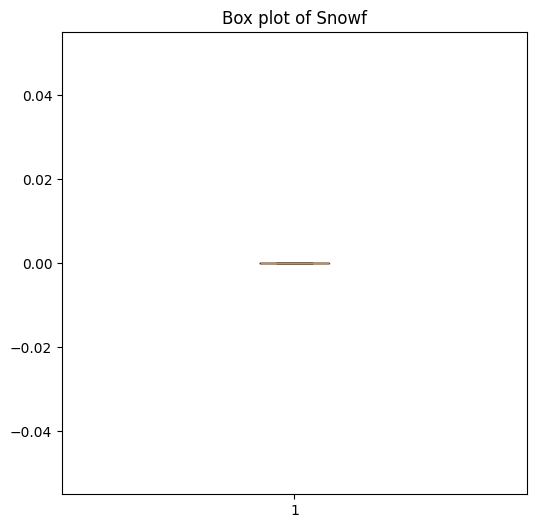

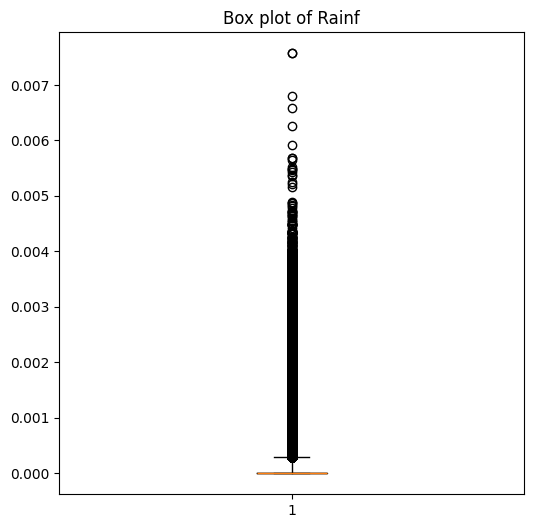

In [18]:
for column in df_climat_sample.columns:
    if df_climat_sample[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(6, 6))
        plt.boxplot(df_climat_sample[column], whis=[5, 95])
        plt.title(f"Box plot of {column}")
        plt.show()

5.1 Histograms

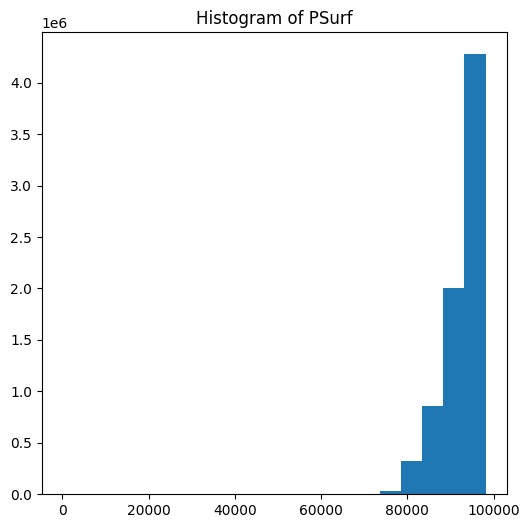

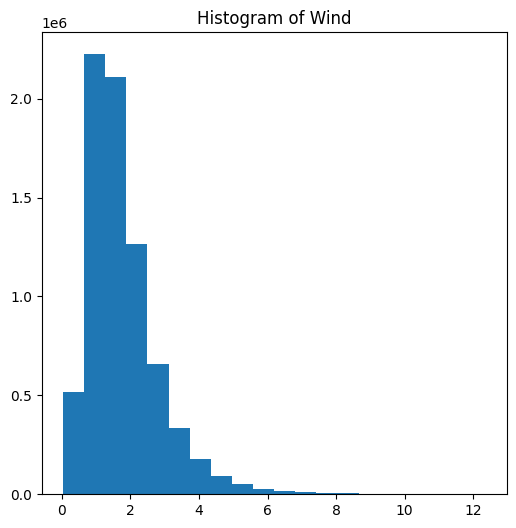

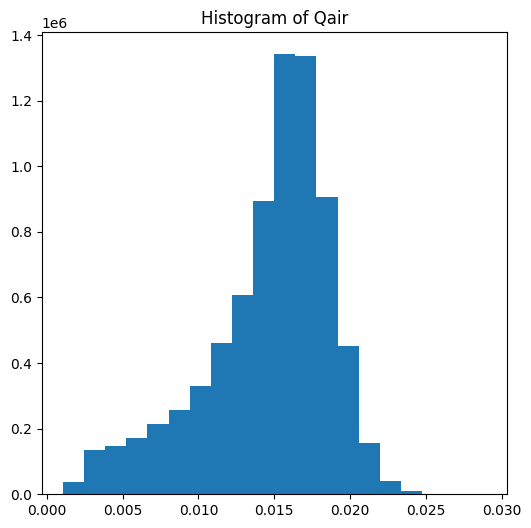

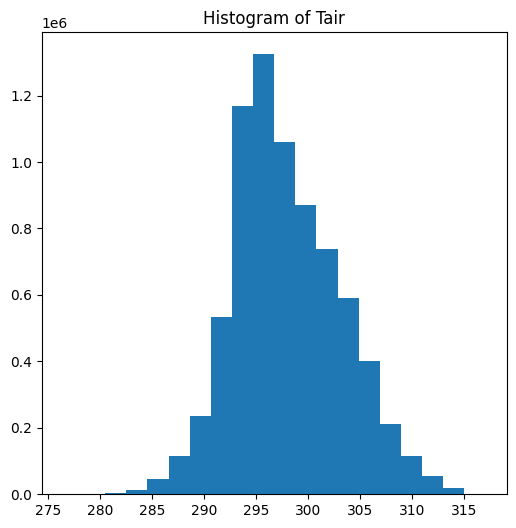

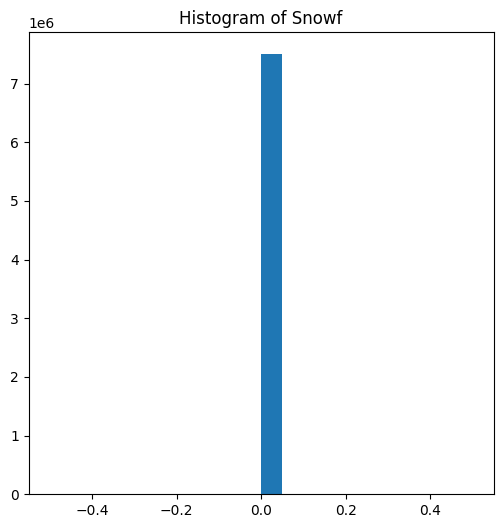

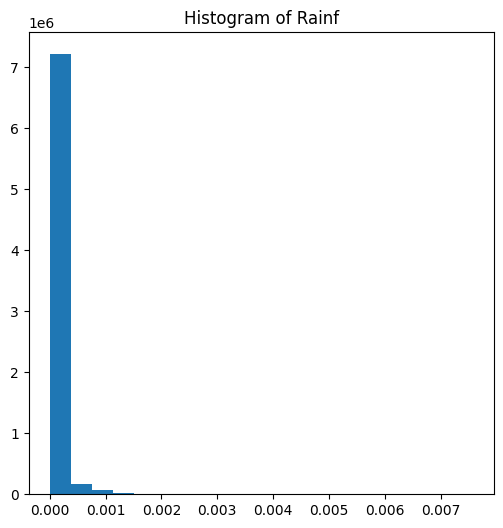

In [20]:
# histogram of each numerical value
# should be changes to define costim bins for each 
for column in df_climat_sample.columns:
    if column not in ['lat', 'lon' , 'time']:
        plt.figure(figsize=(6, 6))
        plt.hist(df_climat_sample[column], bins=20)
        plt.title(f"Histogram of {column}")
        plt.show()

### 5. histograms(by season)

visualizing climat all attribute during the year 

done


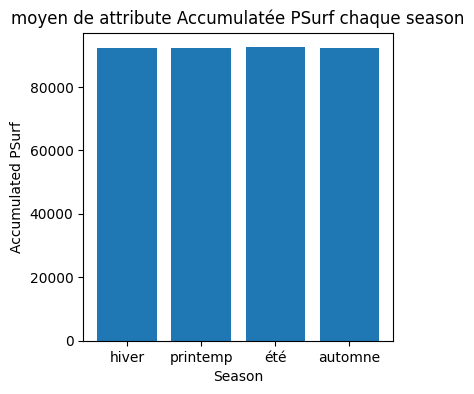

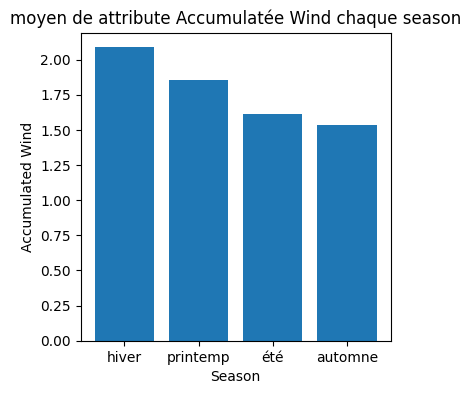

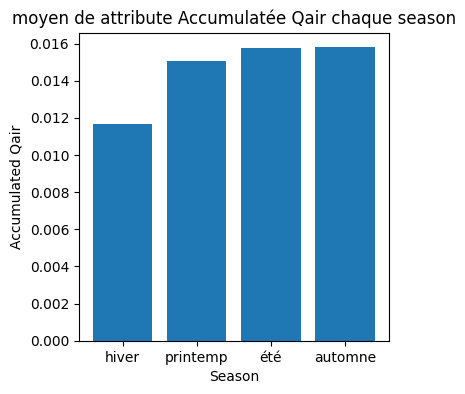

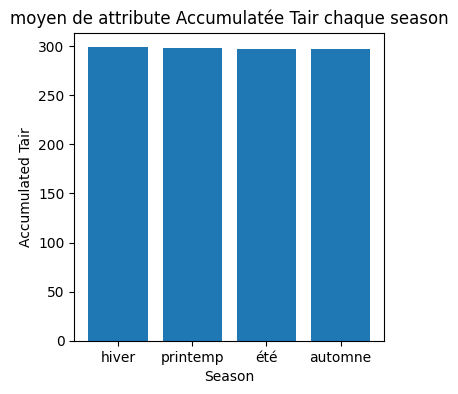

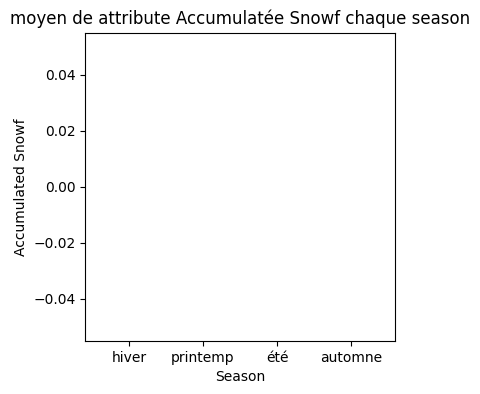

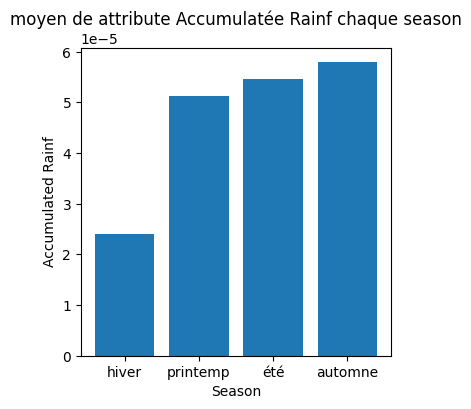

In [21]:
Seasons = ["2019-01-01" , "2019-03-21" , "2019-06-21" , "2019-09-21" , "2019-12-21"]
variables = ['PSurf', 'Wind', 'Qair', 'Tair', 'Snowf', 'Rainf']
#Deviding Dataset into seasons datasets
df_season1 = df_climat_sample[(df_climat_sample["time"]<="2019-03-21")|(df_climat_sample["time"]>"2019-12-21")]
df_season2 = df_climat_sample[(df_climat_sample["time"]>="2019-03-21")&(df_climat_sample["time"]<"2019-06-21")]
df_season3 = df_climat_sample[(df_climat_sample["time"]>="2019-06-21")&(df_climat_sample["time"]<"2019-09-21")]
df_season4 = df_climat_sample[(df_climat_sample["time"]>="2019-09-21")&(df_climat_sample["time"]<"2019-12-21")]
print("done")
for var in variables:
    season_data = [
        sum(df_season1[var]) / len(df_season1),
        sum(df_season2[var]) / len(df_season2),
        sum(df_season3[var]) / len(df_season3),
        sum(df_season4[var]) / len(df_season4),
    ]
    plt.figure(figsize=(4, 4))  # Create a new figure for each variable
    plt.bar(['hiver', 'printemp', 'été', 'automne'], season_data)
    plt.xlabel("Season")
    plt.ylabel(f"Accumulated {var}")
    plt.title(f"moyen de attribute Accumulatée {var} chaque season")
    plt.show()

we can drop snow column bcs its always 0 

### b. Scatter plot (instead of using a scatter plot we will use a heat map to extract the correlation)

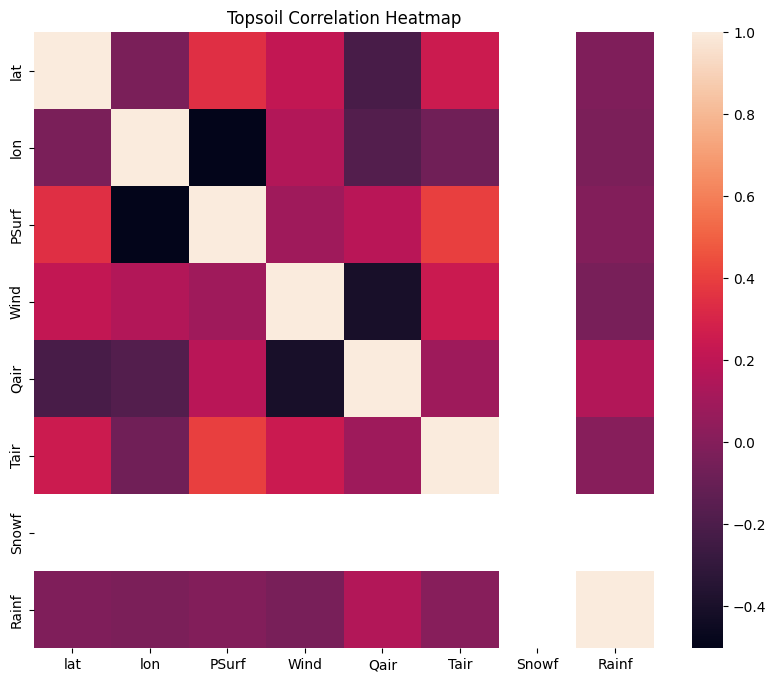

In [22]:
df_corr = df_climat_sample.drop(columns=["time"])
plt.figure(figsize=(10, 8))  
p1 = sns.heatmap(df_corr.corr())
plt.title('Topsoil Correlation Heatmap')
plt.show()

There is no correlation between columns instead the snow because its always 0

# PART 2

1. data reduction by seasons (the idea is to choose the season of a given date) and aggregate other rows if they have the same lat and lon and season ...

In [31]:
def get_season(date):
    month = int(date.split("-")[1])
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
def data_reduction(df , aggregation_type):
    df_copy = df.copy()
    df_copy['Season'] = df_copy['time'].apply(get_season)
    df_copy = df_copy.drop(columns=['time'])
    aggregation_dict ={}
    for i in df_copy.columns :
        if i !="Season" and i!="lat" and i!="lon" :
            aggregation_dict[i]=aggregation_type
    df_copy = df_copy.groupby(['Season', 'lat', 'lon']).agg(aggregation_dict).reset_index()
    return df_copy

df_result = data_reduction(df_climat_sample , "mean")
df_result

,Season,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,Autumn,-8.25,27.25,89822.250723,1.491964,0.015381,297.551084,0.0,3.930377e-05
1,Autumn,-8.25,27.75,88103.313142,1.832416,0.014151,296.485162,0.0,4.011666e-05
2,Autumn,-8.25,28.25,89131.838680,1.649566,0.014557,297.219231,0.0,3.706133e-05
3,Autumn,-8.25,28.75,89582.069825,1.560082,0.014588,297.487379,0.0,3.503685e-05
4,Autumn,-7.75,27.25,92886.961620,1.338001,0.016708,299.049983,0.0,3.786234e-05
...,...,...,...,...,...,...,...,...,...
3419,Winter,10.75,24.25,94962.963380,3.730073,0.004088,299.886663,0.0,0.000000e+00
3420,Winter,11.25,23.25,94283.713064,3.701237,0.003864,298.183342,0.0,2.613838e-07
3421,Winter,11.25,23.75,94339.757703,3.795050,0.003803,298.721119,0.0,1.495871e-07
3422,Winter,11.25,24.25,94706.769091,3.859213,0.003995,299.824437,0.0,0.000000e+00


2.1 data reduction by time searie

In [33]:
from datetime import datetime
def get_week(date):
    week = datetime.strptime(date , '%Y-%m-%d %H:%M:%S')
    week_num = week.isocalendar()[1]
    return week_num

def data_reduction_week(df):
    df_copy = df.copy()
    df_copy['Week'] = df_copy['time'].apply(get_week)
    df_copy = df_copy.drop(columns=['time'])
    aggregation_dict ={}
    for i in df_copy.columns :
        if i !="Season" and i!="lat" and i!="lon" and i!= "Week" :
            aggregation_dict[i]="mean"
    df_copy = df_copy.groupby(['Week', 'lat', 'lon']).agg(aggregation_dict).reset_index()
    return df_copy

df_week = data_reduction_week(df_climat_sample)

In [34]:
df_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44512 entries, 0 to 44511
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Week    44512 non-null  int64  
 1   lat     44512 non-null  float64
 2   lon     44512 non-null  float64
 3   PSurf   44512 non-null  float64
 4   Wind    44512 non-null  float64
 5   Qair    44512 non-null  float64
 6   Tair    44512 non-null  float64
 7   Snowf   44512 non-null  float64
 8   Rainf   44512 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.1 MB


2. data integration with the soil data

In [35]:
def data_integration(df1, df2):
    # adding df2 s columns to df1
    for col in df2.columns : 
        if col != "geometry":
            df1[col]= None
    for i in range(len(df1)):
        point = Point(df1.iloc[i]["lat"], df1.iloc[i]["lon"])
        for j in range(len(df2)):
            try:
                polygon = wkt.loads(df2.iloc[j]["geometry"])
                if polygon.contains(point):
                    print(f"found{i}")
                    for cols in df2.columns : 
                        df1.loc[i , cols] = df2.iloc[j][cols]
                    break
            except Exception as e:
                pass 
    return df1

df_result = data_integration(df_week , df_soil)
df_result

found0
found1
found2
found3
found4
found5
found6
found7
found8
found9
found10
found11
found12
found13
found14
found15
found16
found17
found18
found19
found20
found21
found22
found23
found24
found25
found27
found28
found29
found30
found31
found32
found33
found34
found35
found36
found37
found38
found39
found40
found41
found42
found43
found44
found45
found46
found47
found48
found49
found50
found51
found52
found54
found55
found56
found57
found58
found59
found60
found61
found62
found63
found64
found67
found68
found69
found70
found71
found72
found73
found74
found75
found77
found79
found80
found81
found82
found83
found85
found86
found87
found88
found89
found90
found95
found96
found97
found98
found99
found100
found102
found103
found109
found111
found112
found113
found114
found115
found116
found117
found128
found129
found130
found131
found132
found133
found134
found135
found146
found147
found148
found149
found150
found151
found155
found164
found165
found166
found167
found168
found171
found172
f

,Week,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf,CNT_FULLNAME,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,1,-8.25,27.25,89931.291146,1.136879,0.016963,296.235664,0.0,0.000099,ALGERIA,...,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9,POLYGON ((-7.836559772491455 27.20820999145507...
1,1,-8.25,27.75,88198.302755,1.376387,0.016038,295.105311,0.0,0.000079,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
2,1,-8.25,28.25,89235.961901,1.177007,0.016680,295.742557,0.0,0.000072,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
3,1,-8.25,28.75,89689.187172,1.128759,0.016661,295.820262,0.0,0.000067,ALGERIA,...,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8,POLYGON ((-7.384270191192627 29.44722938537597...
4,1,-7.75,27.25,93016.242297,1.004774,0.018415,297.800633,0.0,0.000084,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((-6.073760032653809 27.21665954589843...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44507,52,10.75,24.25,95069.251571,3.931863,0.003127,297.350841,0.0,0.000000,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((10.86658000946045 24.542949676513672...
44508,52,11.25,23.25,94377.464238,3.842586,0.002989,296.223971,0.0,0.000000,ALGERIA,...,4.0,27.5,14.0,0.05,0.25,0.6,0.75,5.5,4.0,POLYGON ((9.471320152282715 26.239479064941406...
44509,52,11.25,23.75,94440.172702,3.985179,0.002910,296.569960,0.0,0.000000,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((11.212140083312988 23.88311004638672...
44510,52,11.25,24.25,94817.381351,4.046146,0.003159,297.549713,0.0,0.000000,ALGERIA,...,7.9,66.0,50.0,13.1,22.1,1.5,1.4,8.0,11.0,POLYGON ((11.334919929504395 24.26939964294433...


In [40]:
df_result = df_result.dropna()

In [41]:
df_result.to_csv("Integrated.csv")


In [43]:
df_integrated = pd.read_csv("Integrated.csv")
df_integrated.drop(columns= ["Unnamed: 0"])

,Week,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf,CNT_FULLNAME,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,1,-8.25,27.25,89931.291146,1.136879,0.016963,296.235664,0.0,0.000099,ALGERIA,...,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9,POLYGON ((-7.836559772491455 27.20820999145507...
1,1,-8.25,27.75,88198.302755,1.376387,0.016038,295.105311,0.0,0.000079,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
2,1,-8.25,28.25,89235.961901,1.177007,0.016680,295.742557,0.0,0.000072,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
3,1,-8.25,28.75,89689.187172,1.128759,0.016661,295.820262,0.0,0.000067,ALGERIA,...,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8,POLYGON ((-7.384270191192627 29.44722938537597...
4,1,-7.75,27.25,93016.242297,1.004774,0.018415,297.800633,0.0,0.000084,ALGERIA,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,POLYGON ((-6.073760032653809 27.21665954589843...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,52,10.75,24.25,95069.251571,3.931863,0.003127,297.350841,0.0,0.000000,ALGERIA,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,POLYGON ((10.86658000946045 24.542949676513672...
30624,52,11.25,23.25,94377.464238,3.842586,0.002989,296.223971,0.0,0.000000,ALGERIA,...,4.00,27.5,14.0,0.05,0.25,0.60,0.75,5.5,4.0,POLYGON ((9.471320152282715 26.239479064941406...
30625,52,11.25,23.75,94440.172702,3.985179,0.002910,296.569960,0.0,0.000000,ALGERIA,...,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,POLYGON ((11.212140083312988 23.88311004638672...
30626,52,11.25,24.25,94817.381351,4.046146,0.003159,297.549713,0.0,0.000000,ALGERIA,...,7.90,66.0,50.0,13.10,22.10,1.50,1.40,8.0,11.0,POLYGON ((11.334919929504395 24.26939964294433...


In [ ]:
def define_outliers(df_ , column , method):
    if method=="IQR":
        Q1 = df_[column].quantile(0.25)
        Q3 = df_[column].quantile(0.75)
        IQR = Q3-Q1
        lower_bound =  Q1 - (1.5 * IQR)
        upper_bound =  Q3 + (1.5 * IQR)
        return lower_bound , upper_bound
    else :
        pass
def handling_outliers(df , handling_method , defining_method=None , percentage=None , transformation_type=None):
    for i in df:
        if i != "lat" and i != "lon":
            try : 
                #handling
                if handling_method =="transforme":
                    if transformation_type == "log":
                        df[i]=np.log10(df[i]) 
                    else :
                        print("choose a valid transformation type please")

                #IG this is wrong 
                elif handling_method == "Trim":
                    df = df.sort_values(i)
                    number = len(df)//percentage
                    print(number)
                    df = df.iloc[number:len(df)-number]
                    
                # deleting directly 
                else:
                    lower , upper = define_outliers(df , i , defining_method)
                    df = df[(df[i] >= lower) & (df[i] <= upper)]
            except Exception as e:
                continue
    return df

df_result = handling_outliers(df_result , "transforme" , transformation_type="log")
df_result

c:\Users\abdo7\OneDrive\Bureau\DM project\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,PSurf,Wind,Tair,Rainf
0,NaN,-0.246526,-1.961907,NaN
1,0.035226,-0.149467,NaN,-0.581876
2,NaN,-0.982880,-0.139772,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
579853,-0.118112,NaN,NaN,NaN
579854,-0.233933,NaN,NaN,NaN
579855,-0.046910,NaN,-0.190541,NaN
579856,-0.949110,NaN,NaN,NaN


### 4.Normalization (Min Max)

In [35]:
def MinMax_Normalization(df):
    df_minmax = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype == 'float64' and column not in ["lat","lon"]:
            bas = min(df[column])
            haut = max(df[column])
            gap = haut - bas
            df_minmax[column] = (df[column] - bas)/gap
    return df_minmax

MinMax_Normalization(df_result)

,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,0.631294,0.116454,0.719450,0.556659,NaN,0.238368
1,0.550271,0.172878,0.643012,0.496526,NaN,0.243298
2,0.598751,0.142573,0.668268,0.537938,NaN,0.224768
3,0.619973,0.127743,0.670158,0.553065,NaN,0.212490
4,0.775749,0.090937,0.801900,0.641218,NaN,0.229626
...,...,...,...,...,...,...
3419,0.873602,0.487381,0.017709,0.688419,NaN,0.000000
3420,0.841586,0.482602,0.003779,0.592328,NaN,0.001585
3421,0.844227,0.498150,0.000000,0.622666,NaN,0.000907
3422,0.861526,0.508784,0.011952,0.684908,NaN,0.000000


### 4.Normalization (Z-score)

In [ ]:
def ZScore_Normalization(df):
    df_zscore = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype == 'float64' and column not in ["lat","lon"]:
            mean_value = df[column].mean()
            std_value = df[column].std()
            df_zscore[column] = ((df[column]) - mean_value)/std_value
    return df_zscore
df_result = ZScore_Normalization(df_result)
df_result

5.1 Data reduction via discretization of continous data : Equal Frequence

In [ ]:
def discritize(df_climat, column , Q):
    df_disc = pd.DataFrame()

    if df_climat[column].dtype in ['float64', 'int64']:
        intervals = []
        sorted_data = sorted(df_climat[column])
        N = len(sorted_data)
        for i in range(1, Q+1):
            position = int(N * i / Q) 
            intervals.append(sorted_data[min(position, N - 1)]) 
        intervals = set(intervals)
        interv = sorted(set(intervals))
        df_disc[column] = pd.cut(df_climat[column], bins=interv)
        print(f"\nQuantile distribution for column '{column}':")
        print(df_disc[column].value_counts())
        return df_disc

df_result["Qair"] = discritize(df_result, "Qair" , 5)
df_result



Quantile distribution for column 'Qair':
Qair
(0.0117, 0.0147]    685
(0.0147, 0.0163]    685
(0.0163, 0.0175]    685
(0.0175, 0.0199]    684
Name: count, dtype: int64


,Season,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf,CNT_FULLNAME,...,CEC subsoil,CEC clay topsoil,CEC Clay subsoil,CaCO3 % topsoil,CaCO3 % subsoil,BD topsoil,BD subsoil,C/N topsoil,C/N subsoil,geometry
0,Autumn,-8.25,27.25,89822.250723,1.491964,"(0.0147, 0.0163]",297.551084,0.0,3.930377e-05,ALGERIA,...,11.94,57.1,46.8,5.46,7.82,1.38,1.37,9.8,9.9,POLYGON ((-7.836559772491455 27.20820999145507...
1,Autumn,-8.25,27.75,88103.313142,1.832416,"(0.0117, 0.0147]",296.485162,0.0,4.011666e-05,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
2,Autumn,-8.25,28.25,89131.838680,1.649566,"(0.0117, 0.0147]",297.219231,0.0,3.706133e-05,ALGERIA,...,10.31,57.8,44.8,18.23,26.54,1.48,1.43,10.3,10.8,POLYGON ((-8.22577953338623 28.515199661254883...
3,Autumn,-8.25,28.75,89582.069825,1.560082,"(0.0117, 0.0147]",297.487379,0.0,3.503685e-05,ALGERIA,...,10.06,56.7,45.8,8.54,11.32,1.42,1.38,10.3,10.8,POLYGON ((-7.384270191192627 29.44722938537597...
4,Autumn,-7.75,27.25,92886.961620,1.338001,"(0.0163, 0.0175]",299.049983,0.0,3.786234e-05,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((-6.073760032653809 27.21665954589843...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,Winter,10.75,24.25,94962.963380,3.730073,NaN,299.886663,0.0,0.000000e+00,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((10.86658000946045 24.542949676513672...
3420,Winter,11.25,23.25,94283.713064,3.701237,NaN,298.183342,0.0,2.613838e-07,ALGERIA,...,4.0,27.5,14.0,0.05,0.25,0.6,0.75,5.5,4.0,POLYGON ((9.471320152282715 26.239479064941406...
3421,Winter,11.25,23.75,94339.757703,3.795050,NaN,298.721119,0.0,1.495871e-07,ALGERIA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POLYGON ((11.212140083312988 23.88311004638672...
3422,Winter,11.25,24.25,94706.769091,3.859213,NaN,299.824437,0.0,0.000000e+00,ALGERIA,...,7.9,66.0,50.0,13.1,22.1,1.5,1.4,8.0,11.0,POLYGON ((11.334919929504395 24.26939964294433...


5.2 Discretization using the Amplitude method

In [37]:
def Amplitude(df , column):
    try : 
        intervals = []
        k = int(1 + (10/3) * math.log10(len(df)))
        max_val = max(df[column])
        min_val = min(df[column])

        width = (max_val - min_val) / k
        for i in range(k+1):
            intervals.append(min_val)
            min_val+=width
        df[column]  = pd.cut(df[column] , intervals )
        print(df[column].value_counts())
        return df
    except Exception as e: 
        print("non numerical values detected")

Amplitude(df_climat_sample , "Qair")

Qair
(0.0156, 0.0168]      1238538
(0.0168, 0.018]       1091533
(0.0144, 0.0156]       985566
(0.018, 0.0192]        743561
(0.0132, 0.0144]       651867
(0.012, 0.0132]        494833
(0.0192, 0.0205]       399361
(0.0108, 0.012]        386979
(0.00954, 0.0108]      287746
(0.00833, 0.00954]     229368
(0.00712, 0.00833]     195357
(0.0059, 0.00712]      168075
(0.0205, 0.0217]       162667
(0.00469, 0.0059]      134945
(0.00348, 0.00469]     127348
(0.00227, 0.00348]     105676
(0.0217, 0.0229]        51590
(0.00106, 0.00227]      25088
(0.0229, 0.0241]        14563
(0.0241, 0.0253]         3347
(0.0253, 0.0265]          503
(0.0265, 0.0277]           44
(0.0277, 0.0289]            2
Name: count, dtype: int64


,time,lat,lon,PSurf,Wind,Qair,Tair,Snowf,Rainf
0,2019-01-01 00:00:00,-8.25,27.25,89899.380,1.157487,"(0.0144, 0.0156]",292.66270,0.0,0.000023
2,2019-01-01 00:00:00,-8.25,28.25,106.000,1.004880,"(0.0144, 0.0156]",292.43445,0.0,0.000076
3,2019-01-01 00:00:00,-8.25,28.75,89687.410,0.601725,"(0.0156, 0.0168]",293.01035,0.0,0.000186
4,2019-01-01 00:00:00,-7.75,27.25,92976.305,1.242354,"(0.0156, 0.0168]",294.42303,0.0,0.000000
5,2019-01-01 00:00:00,-7.75,27.75,91901.460,1.362499,"(0.0156, 0.0168]",294.10535,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
7498555,2019-12-31 23:00:00,10.75,24.25,94920.160,2.886540,"(0.00227, 0.00348]",292.23990,0.0,0.000000
7498556,2019-12-31 23:00:00,11.25,23.25,94242.984,3.429666,"(0.00106, 0.00227]",290.26434,0.0,0.000000
7498557,2019-12-31 23:00:00,11.25,23.75,94301.290,3.212981,"(0.00227, 0.00348]",291.02036,0.0,0.000000
7498558,2019-12-31 23:00:00,11.25,24.25,94672.484,3.119326,"(0.00227, 0.00348]",292.81845,0.0,0.000000


6. Data reduction (elimination of redundancies) horizontal / vertical.

In [ ]:
# horizontally
# appel l descritazation ...
def reduction_horiz(df_climat):
    df_climat = df_climat.drop_duplicates()
    return df_climat
reduction_horiz(df_result)

Number of dropped values in column Unnamed: 0: 0
Number of dropped values in column time: 571098
Number of dropped values in column lat: 579817
Number of dropped values in column lon: 579822
Number of dropped values in column PSurf: 123197
Number of dropped values in column Wind: 7201
Number of dropped values in column Qair: 579837
Number of dropped values in column Tair: 206006
Number of dropped values in column Rainf: 471263
Number of dropped values in column Qiar D: 579852


,Unnamed: 0,time,lat,lon,PSurf,Wind,Qair,Tair,Rainf,Qiar D
0,9284643,2019-09-20 02:00:00,-0.25,32.75,88484.375,2.372999,"(0.015, 0.0164]",298.03888,0.000000,Q4
1,9258231,2019-09-19 08:00:00,2.25,20.75,96665.400,2.523572,"(0.0164, 0.0178]",295.25610,0.000094,NaN
2,6362307,2019-06-29 14:00:00,1.75,32.75,89528.580,1.882078,"(0.0164, 0.0178]",301.70816,0.000000,NaN
3,787055,2019-01-23 05:00:00,-3.75,30.75,86790.280,1.064415,"(0.015, 0.0164]",291.89690,0.000000,Q3
4,11556526,2019-11-23 05:00:00,4.25,30.25,92055.260,1.334824,"(0.015, 0.0164]",294.55917,0.000000,Q4
...,...,...,...,...,...,...,...,...,...,...
579853,8028768,2019-08-15 15:00:00,2.75,25.25,95379.414,1.206075,"(0.0178, 0.0192]",297.08810,0.000021,NaN
579854,12211646,2019-12-11 17:00:00,1.25,26.25,94668.484,0.544880,"(0.0164, 0.0178]",294.38004,0.000000,NaN
579855,1584441,2019-02-14 17:00:00,1.25,23.75,95920.470,0.842584,"(0.015, 0.0164]",301.29715,0.000000,Q5
579856,6665098,2019-07-08 03:00:00,4.75,30.25,92790.560,1.707657,"(0.0137, 0.015]",293.14880,0.000000,Q2


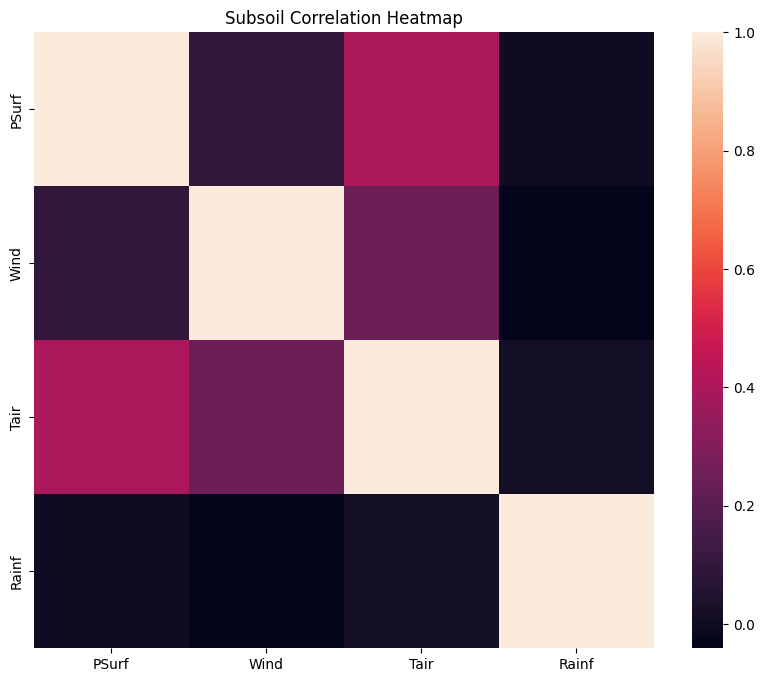

In [53]:
def reduction_vertic(df_climat):
    #df_climat = df_climat.drop('Snowf', axis=1)
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    p2 = sns.heatmap(df_climat.corr())
    plt.title('Subsoil Correlation Heatmap')
    plt.show()
reduction_vertic(df_result)